In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
path = r'/Users/Owner/Documents/CareerFoundry/Data Immersion/Achievement 4/01-07-2024 Instacart Basket Analysis'

In [5]:
df_with_depts = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_depts_final.pkl'))

In [4]:
df_with_depts.head()

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,eval_set,order_number,order_dow,...,activity_lev,married_yes_no,Parental status,income_level,age_category,parent_status_by_age,Family income,Income by age,marital_income,department
0,1,Chocolate Sandwich Cookies,61,19,5.8,3139998,138,prior,28,6,...,High activity,married,parent,Middle income,Senior citizen,Older Parent,Middle-income parent,Middle-income senior,Middle-income married,snacks
1,1,Chocolate Sandwich Cookies,61,19,5.8,1977647,138,prior,30,6,...,High activity,married,parent,Middle income,Senior citizen,Older Parent,Middle-income parent,Middle-income senior,Middle-income married,snacks
2,1,Chocolate Sandwich Cookies,61,19,5.8,389851,709,prior,2,0,...,High activity,married,parent,Middle income,Senior citizen,Older Parent,Middle-income parent,Middle-income senior,Middle-income married,snacks
3,1,Chocolate Sandwich Cookies,61,19,5.8,1701441,777,prior,16,1,...,High activity,married,parent,Middle income,Adult,Adult Parent,Middle-income parent,Middle-income adult,Middle-income married,snacks
4,1,Chocolate Sandwich Cookies,61,19,5.8,1871483,825,prior,3,2,...,High activity,not married,parent,Low income,Young adult,Young parent,Low-income parent,Low-income young adult,Low-income unmarried,snacks


In [9]:
df_with_depts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30964564 entries, 0 to 30964563
Data columns (total 41 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   product_id              int64  
 1   product_name            object 
 2   aisle_id                int64  
 3   department_id           int64  
 4   prices                  float64
 5   order_id                int64  
 6   user_id                 int64  
 7   eval_set                object 
 8   order_number            int64  
 9   order_dow               int64  
 10  order_hour_of_day       int64  
 11  days_since_prior_order  float64
 12  add_to_cart_order       int64  
 13  reordered               int64  
 14  Busiest Days            object 
 15  busiest_period_of_day   object 
 16  price_range_loc         object 
 17  max_order               int64  
 18  loyalty_flag            object 
 19  mean_spend              float64
 20  spending_flag           object 
 21  buy_freq                float

In [21]:
#Creating crosstab for region and age group
age_region = pd.crosstab(index = df_with_depts['region'], columns=df_with_depts['age_category'], normalize="index")
#creating cross tab to display labels
age_region_labels=pd.crosstab(index=df_with_depts['region'],columns=df_with_depts['age_category'])

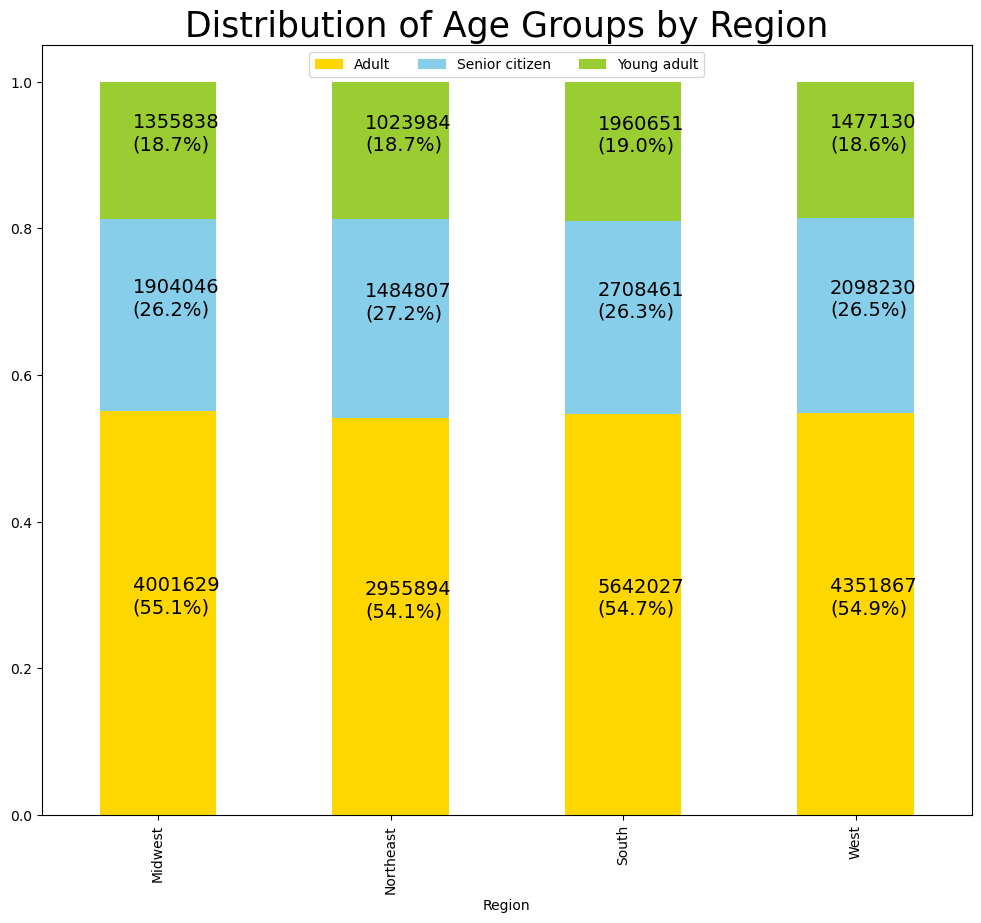

In [29]:
#Creating stacked bar chart for age_region distribution
age_region_dist=age_region.plot(kind='bar',
stacked=True,
color=['gold','skyblue','yellowgreen'],
figsize=(12,10))

plt.title('Distribution of Age Groups by Region', fontsize=25)
plt.legend(loc="upper center", ncol=4)
plt.xlabel("Region")

for n, y in enumerate([*age_region_labels.index.values]):
    for (proportion, count, x_loc) in zip(age_region.loc[y], age_region_labels.loc[y], age_region.loc[y].cumsum()):

        plt.text(y=(x_loc - proportion) + (proportion / 2),
             x=n - 0.11,
             s=f'{count}\n({np.round(proportion * 100, 1)}%)', 
             color="black",
             fontsize=14)
plt.show()

In [35]:
#Creating crosstab for age group by region
age_region_bar=pd.crosstab(df_with_depts['region'], columns=df_with_depts['age_category'])
#creating cross tab to display labels
age_region_bar_labels=pd.crosstab(df_with_depts['region'],columns=df_with_depts['age_category'])

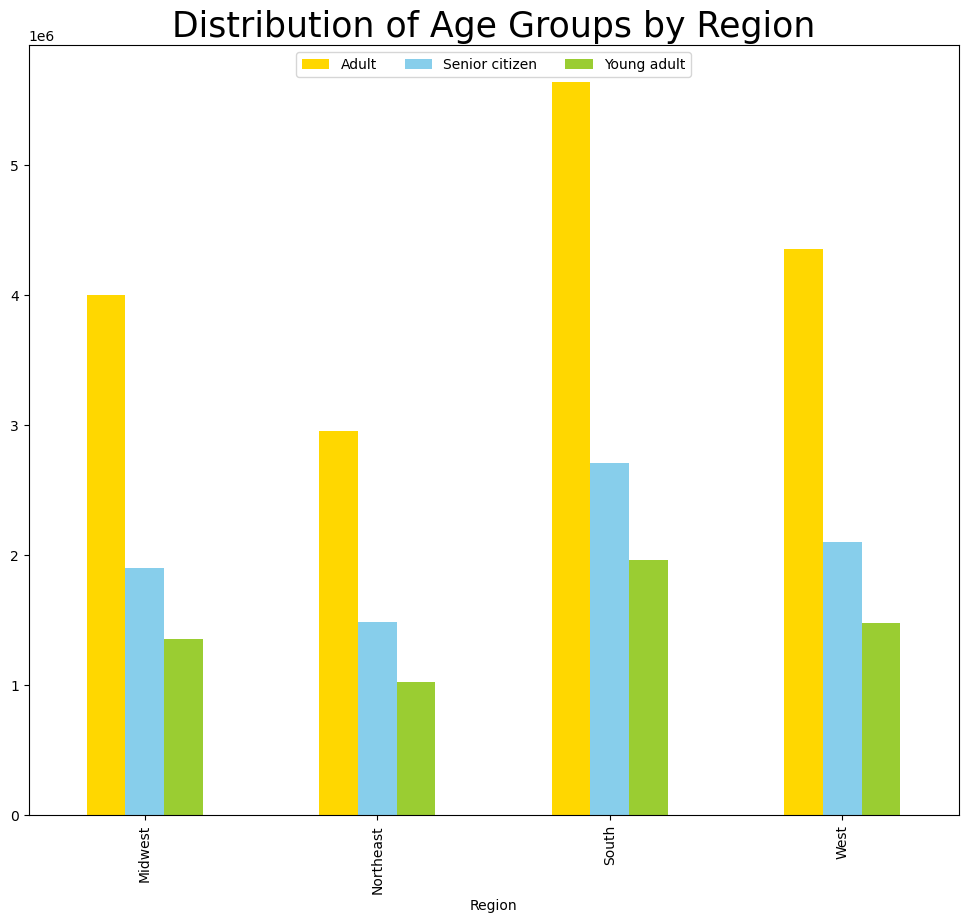

In [37]:
#Creating bar chart for age group by region
age_region_bar_dist=age_region_bar.plot(kind='bar',
stacked=False,
color=['gold','skyblue','yellowgreen'],
figsize=(12,10))
plt.title('Distribution of Age Groups by Region', fontsize=25)
plt.legend(loc="upper center", ncol=3)
plt.xlabel("Region")
plt.show()

In [39]:
#Creating crosstab for department and loyalty status
dept_loyal = pd.crosstab(index = df_with_depts['department'], columns=df_with_depts['loyalty_flag'], normalize="index")
#creating cross tab to display labels
dept_loyal_labels=pd.crosstab(index=df_with_depts['department'],columns=df_with_depts['loyalty_flag'])

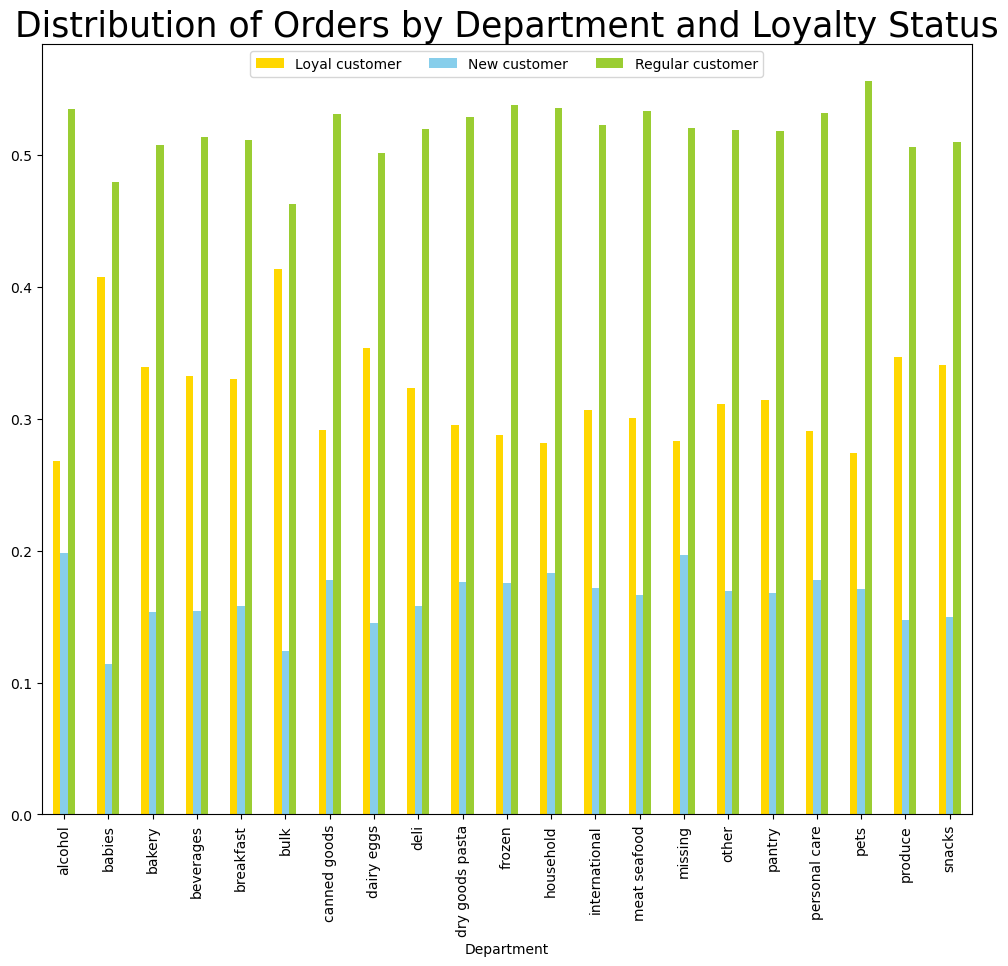

In [49]:
#Creating bar chart for department and loyalty status
dept_loyal_dist=dept_loyal.plot(kind='bar',
stacked=False,
color=['gold','skyblue','yellowgreen'],
figsize=(12,10))
plt.title('Distribution of Orders by Department and Loyalty Status', fontsize=25)
plt.legend(loc="upper center", ncol=3)
plt.xlabel("Department")
plt.show()

In [45]:
#Creating crosstab for department and loyalty status
dept_loyal_2 = pd.crosstab(index = df_with_depts['department'], columns=df_with_depts['loyalty_flag'], normalize="index")
#creating cross tab to display labels
dept_loyal_2_labels=pd.crosstab(index=df_with_depts['department'],columns=df_with_depts['loyalty_flag'])

In [77]:
#Creating crosstab for department and frequency status
dept_freq = pd.crosstab(index = df_with_depts['department'], columns=df_with_depts['frequency_flag'], normalize="index")
#creating cross tab to display labels
dept_freq_labels=pd.crosstab(index=df_with_depts['department'],columns=df_with_depts['frequency_flag'])

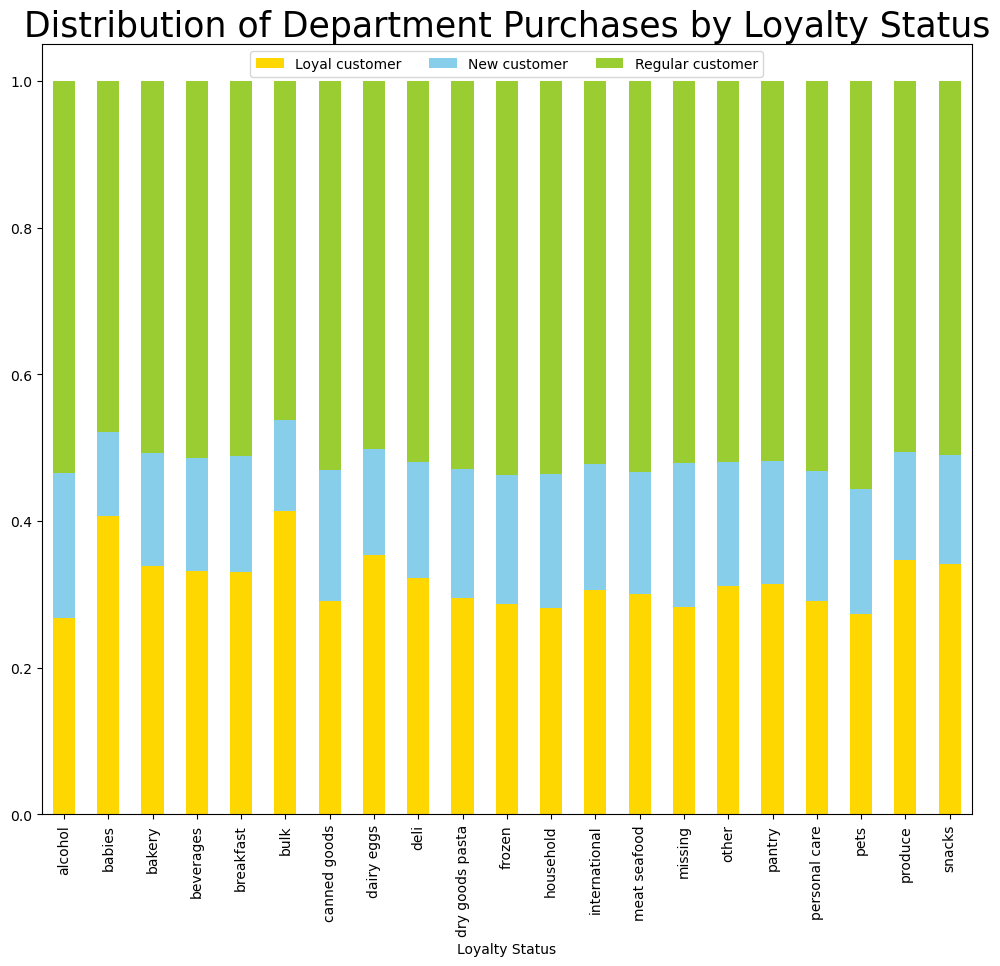

In [149]:
#Creating stacked bar chart for department and loyalty distribution
dept_loyal_2_dist=dept_loyal.plot(kind='bar',
stacked=True,
color=['gold','skyblue','yellowgreen'],
figsize=(12,10))

plt.title('Distribution of Department Purchases by Loyalty Status', fontsize=25)
plt.legend(loc="upper center", ncol=4)
plt.xlabel("Loyalty Status")

plt.savefig('dept_loyal_graph_no_labels', dpi=300)
plt.show()

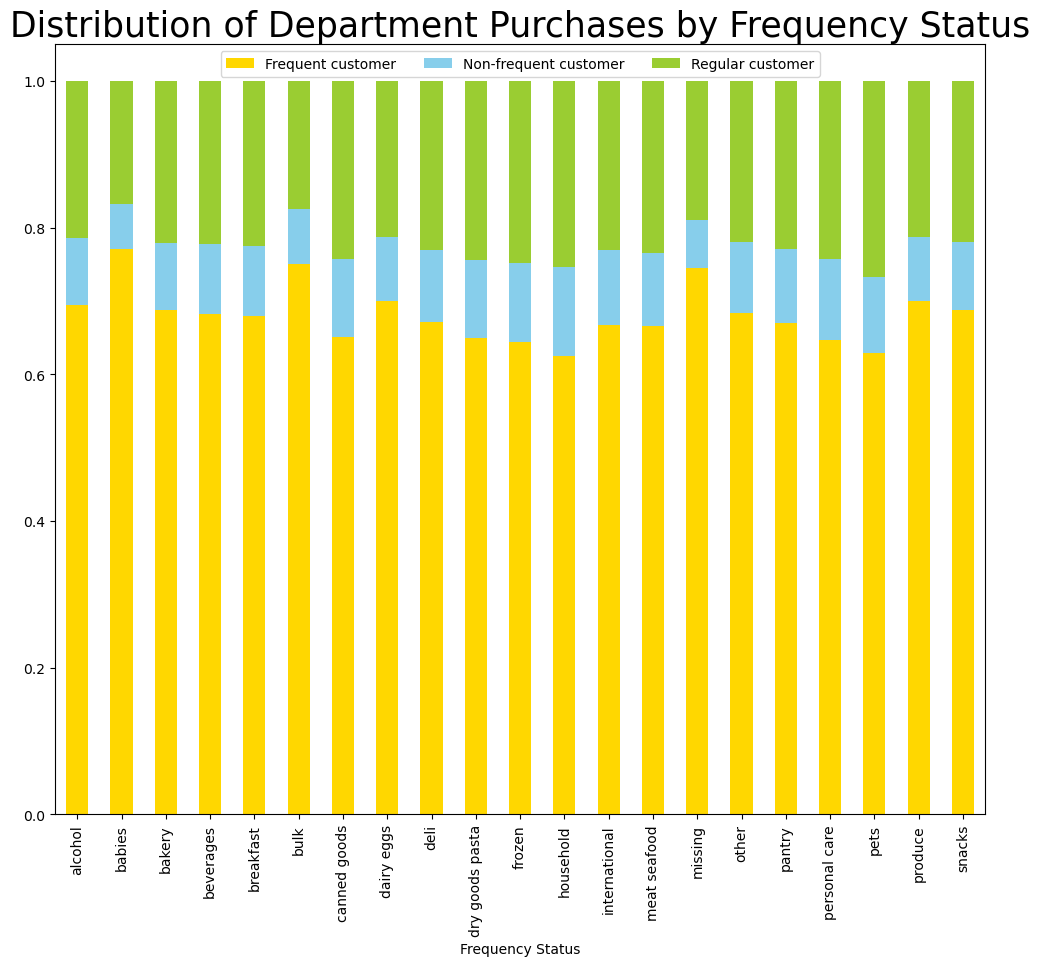

In [153]:
#Creating stacked bar chart for department and frequency distribution
dept_freq_dist=dept_freq.plot(kind='bar',
stacked=True,
color=['gold','skyblue','yellowgreen'],
figsize=(12,10)),

plt.title('Distribution of Department Purchases by Frequency Status', fontsize=25)
plt.legend(loc="upper center", ncol=4)
plt.xlabel("Frequency Status")

plt.savefig('/Users/Owner/Documents/CareerFoundry/Data Immersion/Achievement 4/01-07-2024 Instacart Basket Analysis/04 Analysis/Visualizations/freq_no_labels')
plt.show()

<Axes: xlabel='region'>

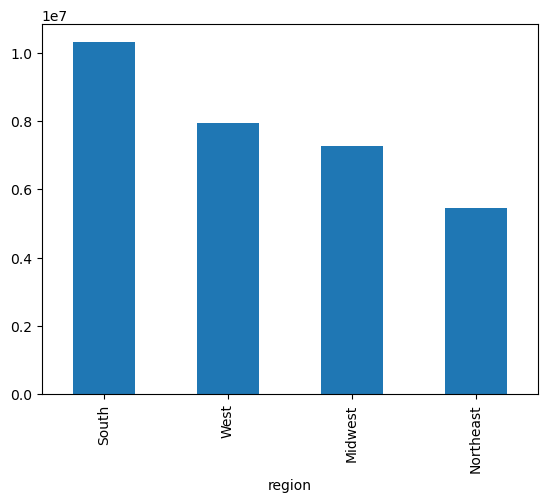

In [167]:
#create bar chart for regions
df_with_depts['region'].value_counts().plot.bar()

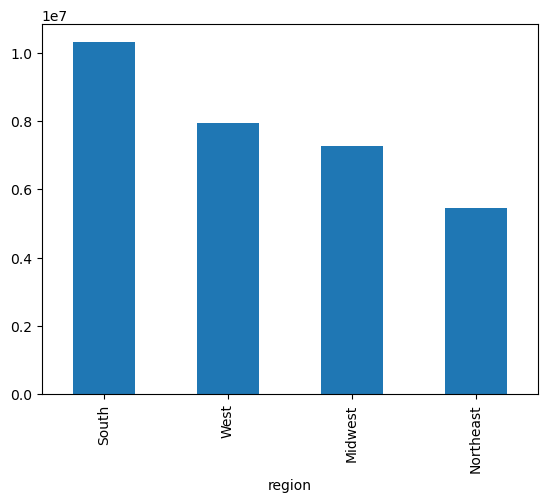

In [169]:
#export chart
bar_region = df_with_depts['region'].value_counts().plot.bar()

In [171]:
#export to file
bar_region.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_region.png'), bbox_inches = 'tight')

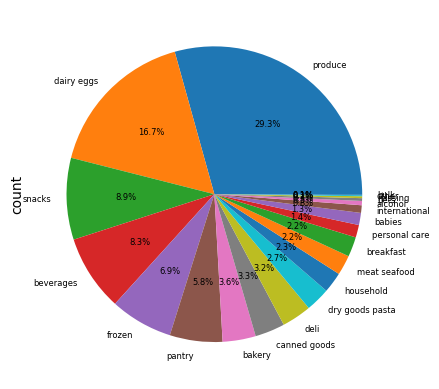

In [193]:
# Create the pie chart
dept_pie = df_with_depts['department'].value_counts().plot.pie(
    autopct=lambda p: '{:.1f}%'.format(p),
    textprops={'fontsize': 6})

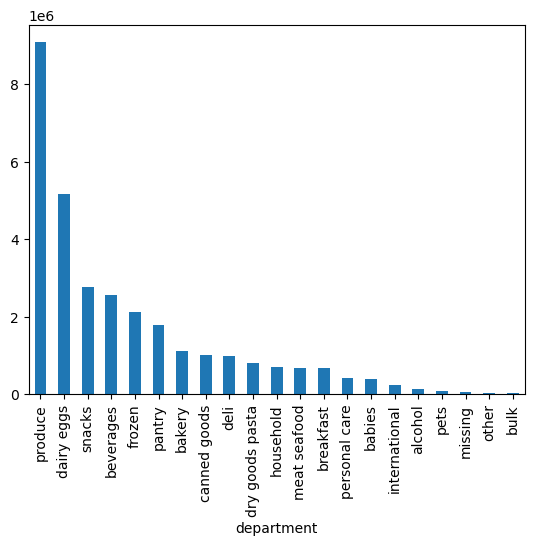

In [199]:
#bar depts
bar_depts = df_with_depts['department'].value_counts().plot.bar()
autopct=lambda p: '{:.1f}%'.format(p),
textprops={'fontsize': 6}

In [201]:
#export pie chart
dept_pie.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'dept_pie.png'), bbox_inches = 'tight')

In [203]:
#export bar graph
bar_depts.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'dept_bar.png'), bbox_inches = 'tight')

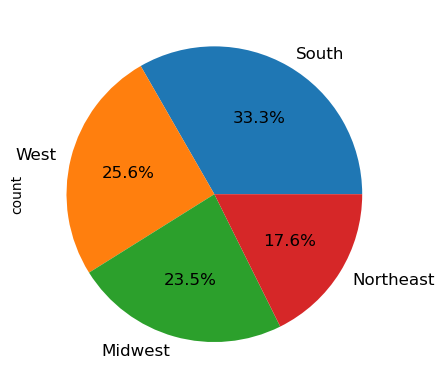

In [223]:
# Create pie chart for region
region_pie = df_with_depts['region'].value_counts().plot.pie(
    autopct=lambda p: '{:.1f}%'.format(p),
    textprops={'fontsize': 12})

In [225]:
#export 
region_pie.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'region_pie.png'), bbox_inches = 'tight')

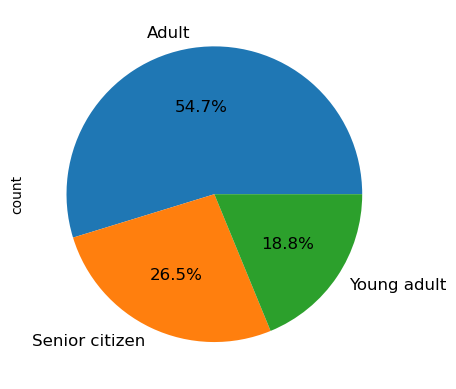

In [215]:
# Create pie chart for age group
age_pie = df_with_depts['age_category'].value_counts().plot.pie(
    autopct=lambda p: '{:.1f}%'.format(p),
    textprops={'fontsize': 12})

In [219]:
#export 
age_pie.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'age_pie.png'), bbox_inches = 'tight')

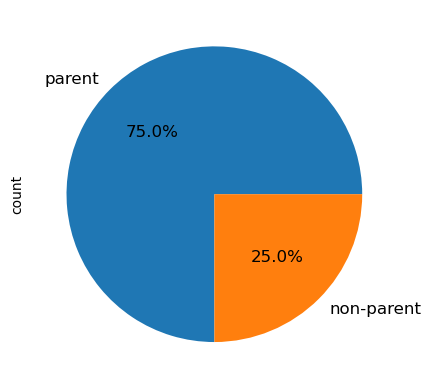

In [227]:
# Create pie chart for parenthood
parent_pie = df_with_depts['Parental status'].value_counts().plot.pie(
    autopct=lambda p: '{:.1f}%'.format(p),
    textprops={'fontsize': 12})

In [229]:
#export 
parent_pie.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'parent_pie.png'), bbox_inches = 'tight')

Day of Week and Hour of Day

In [233]:
#Create visualization for time of day
# Count the number of orders by time of day and parental status
count_df = df_with_depts.groupby(['order_hour_of_day', 'Parental status']).size().unstack(fill_value=0)

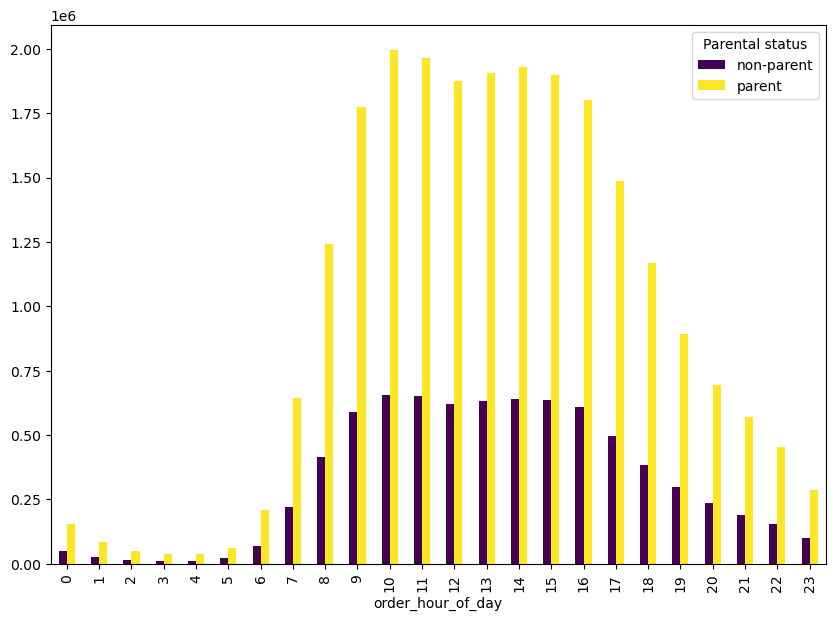

In [237]:
# Plotting
ax = count_df.plot(kind='bar', stacked=False, figsize=(10, 7), colormap='viridis')

In [240]:
#Creating crosstab for time of day and family status
parent_time_of_day = pd.crosstab(index = df_with_depts['order_hour_of_day'], columns=df_with_depts['Parental status'], normalize="index")
#creating cross tab to display labels
parent_time_labels=pd.crosstab(index=df_with_depts['order_hour_of_day'],columns=df_with_depts['Parental status'])

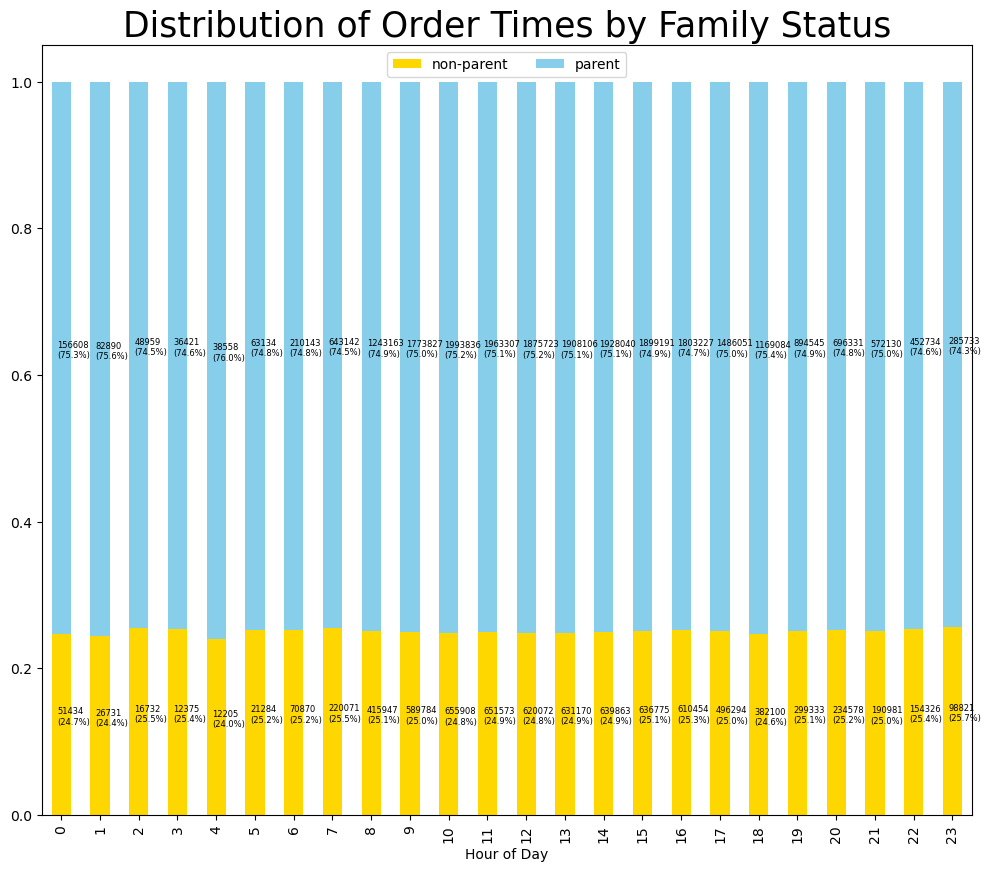

In [252]:
#Creating stacked bar chart for time of day and status distribution
parent_time_of_day_dist=parent_time_of_day.plot(kind='bar',
stacked=True,
color=['khaki','cornflowerblue]]
figsize=(12,10))

plt.title('Distribution of Order Times by Family Status', fontsize=25)
plt.legend(loc="upper center", ncol=4)
plt.xlabel("Hour of Day")

for n, y in enumerate([*parent_time_labels.index.values]):
    for (proportion, count, x_loc) in zip(parent_time_of_day.loc[y], parent_time_labels.loc[y], parent_time_of_day.loc[y].cumsum()):

        plt.text(y=(x_loc - proportion) + (proportion / 2),
             x=n - 0.11,
             s=f'{count}\n({np.round(proportion * 100, 1)}%)', 
             color="black",
             fontsize=6)
plt.savefig('/Users/Owner/Documents/CareerFoundry/Data Immersion/Achievement 4/01-07-2024 Instacart Basket Analysis/04 Analysis/Visualizations/fam_hour_no_labels')
plt.show()

In [12]:
# Count the number of orders by day of the week and region
count_df = df_with_depts.groupby(['order_dow', 'region']).size().unstack(fill_value=0)

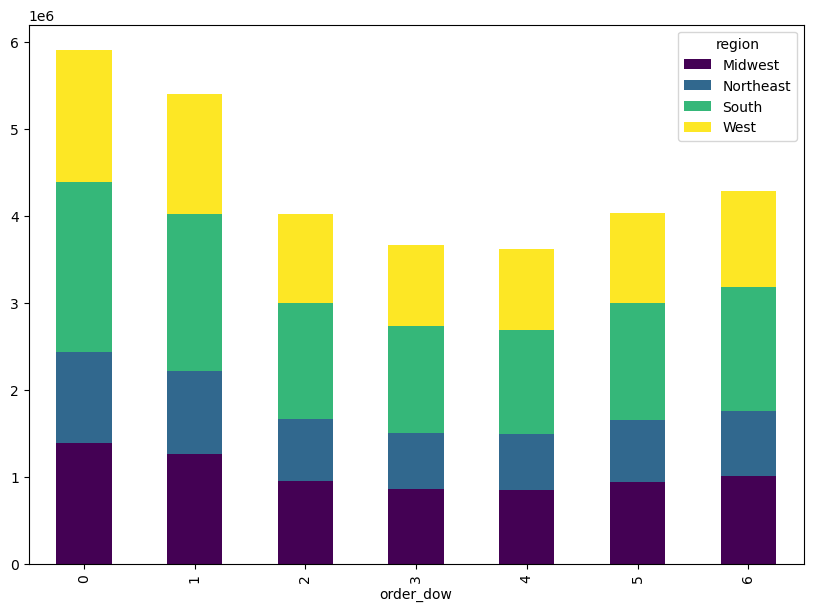

In [14]:
# Plotting
ax = count_df.plot(kind='bar', stacked=True, figsize=(10, 7), colormap='viridis')

In [16]:
#export to file
ax.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'stacked_bar_region.png'))

In [18]:
#Creating crosstab for day of week and family status
parent_dow = pd.crosstab(index = df_with_depts['order_dow'], columns=df_with_depts['Parental status'], normalize="index")
#creating cross tab to display labels
parent_dow_labels=pd.crosstab(index=df_with_depts['order_dow'],columns=df_with_depts['Parental status'])

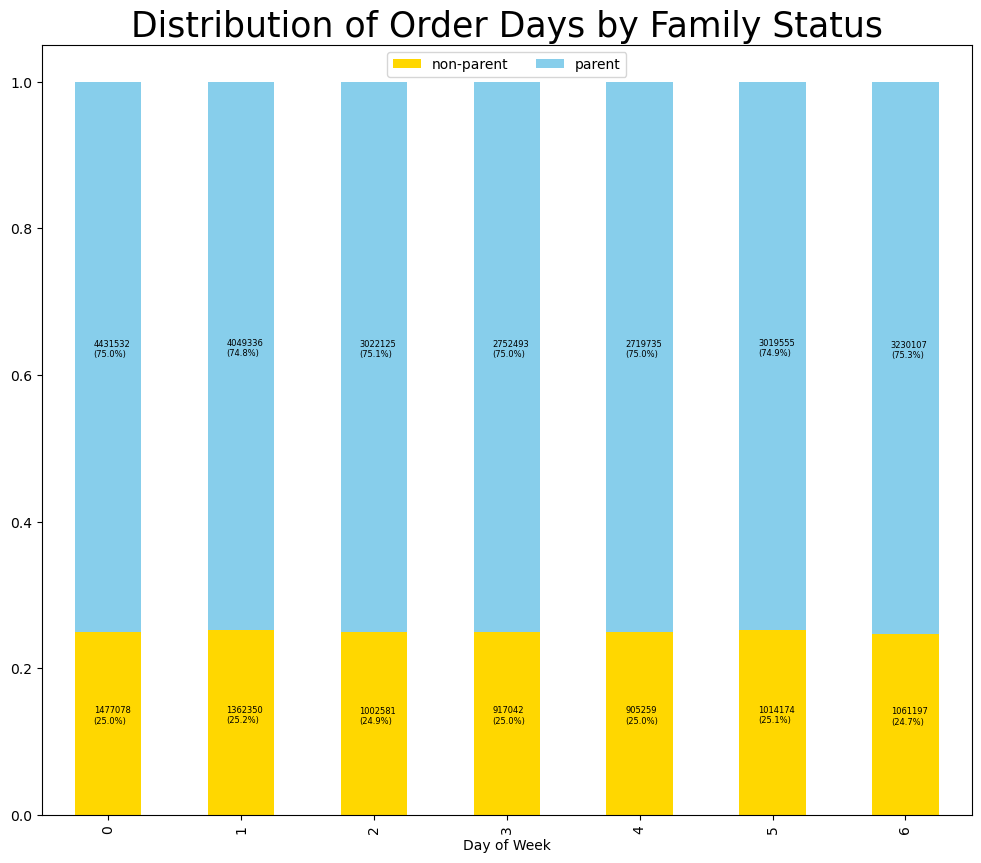

In [24]:
#Creating stacked bar chart for time of day and status distribution
parent_dow_dist=parent_dow.plot(kind='bar',
stacked=True,
color=['khaki','cornflowerblue'],
figsize=(12,10))

plt.title('Distribution of Order Days by Family Status', fontsize=25)
plt.legend(loc="upper center", ncol=4)
plt.xlabel("Day of Week")

for n, y in enumerate([*parent_dow_labels.index.values]):
    for (proportion, count, x_loc) in zip(parent_dow.loc[y], parent_dow_labels.loc[y], parent_dow.loc[y].cumsum()):

        plt.text(y=(x_loc - proportion) + (proportion / 2),
             x=n - 0.11,
             s=f'{count}\n({np.round(proportion * 100, 1)}%)', 
             color="black",
             fontsize=6)
plt.savefig('/Users/Owner/Documents/CareerFoundry/Data Immersion/Achievement 4/01-07-2024 Instacart Basket Analysis/04 Analysis/Visualizations/fam_dow')
plt.show()

In [26]:
#Creating crosstab for day of week and age
age_dow = pd.crosstab(index = df_with_depts['order_dow'], columns=df_with_depts['age_category'], normalize="index")
#creating cross tab to display labels
age_dow_labels=pd.crosstab(index=df_with_depts['order_dow'],columns=df_with_depts['age_category'])

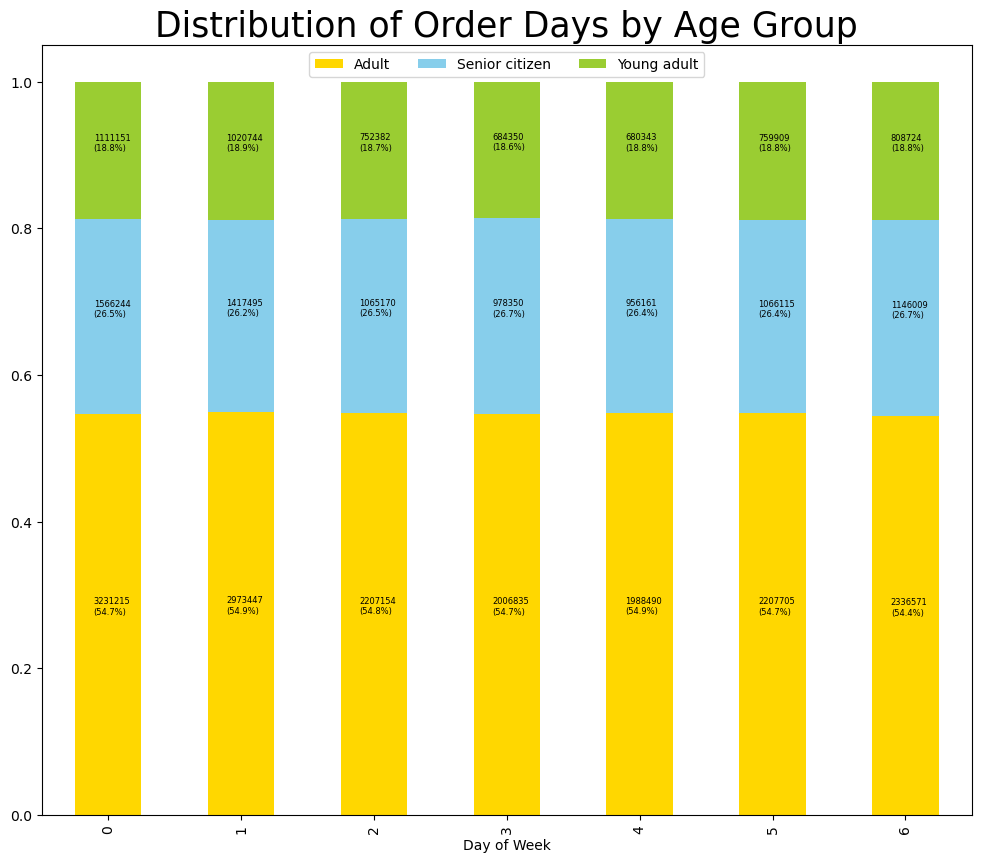

In [28]:
#Creating stacked bar chart for time of day and status distribution
age_dow_dist=age_dow.plot(kind='bar',
stacked=True,
color=['gold','skyblue','yellowgreen'],
figsize=(12,10))

plt.title('Distribution of Order Days by Age Group', fontsize=25)
plt.legend(loc="upper center", ncol=4)
plt.xlabel("Day of Week")

for n, y in enumerate([*age_dow_labels.index.values]):
    for (proportion, count, x_loc) in zip(age_dow.loc[y], age_dow_labels.loc[y], age_dow.loc[y].cumsum()):

        plt.text(y=(x_loc - proportion) + (proportion / 2),
             x=n - 0.11,
             s=f'{count}\n({np.round(proportion * 100, 1)}%)', 
             color="black",
             fontsize=6)
plt.savefig('/Users/Owner/Documents/CareerFoundry/Data Immersion/Achievement 4/01-07-2024 Instacart Basket Analysis/04 Analysis/Visualizations/age_dow')
plt.show()

In [30]:
#Creating crosstab for day of week and region
region_dow = pd.crosstab(index = df_with_depts['order_dow'], columns=df_with_depts['region'], normalize="index")
#creating cross tab to display labels
region_dow_labels=pd.crosstab(index=df_with_depts['order_dow'],columns=df_with_depts['region'])

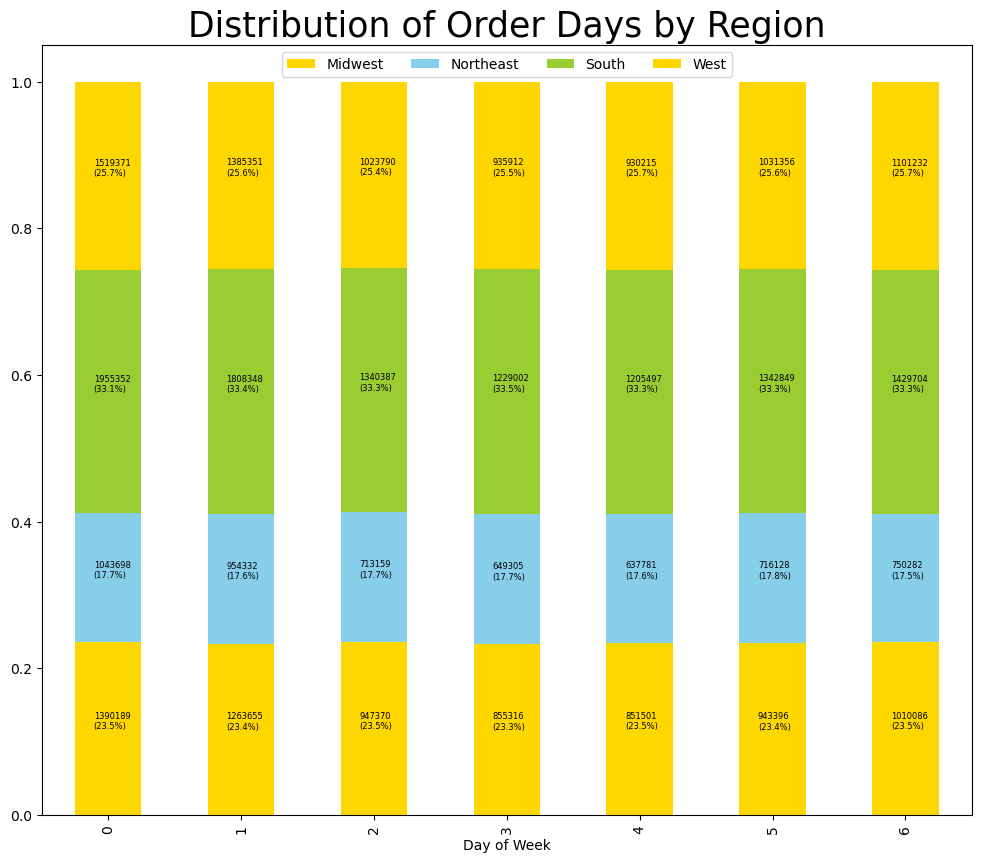

In [32]:
#Creating stacked bar chart for time of day and status distribution
region_dow_dist=region_dow.plot(kind='bar',
stacked=True,
color=['moccasin','royalblue','forestgreen', 'goldenrod'],
figsize=(12,10))

plt.title('Distribution of Order Days by Region', fontsize=25)
plt.legend(loc="upper center", ncol=4)
plt.xlabel("Day of Week")

for n, y in enumerate([*region_dow_labels.index.values]):
    for (proportion, count, x_loc) in zip(region_dow.loc[y], region_dow_labels.loc[y], region_dow.loc[y].cumsum()):

        plt.text(y=(x_loc - proportion) + (proportion / 2),
             x=n - 0.11,
             s=f'{count}\n({np.round(proportion * 100, 1)}%)', 
             color="black",
             fontsize=6)
plt.savefig('/Users/Owner/Documents/CareerFoundry/Data Immersion/Achievement 4/01-07-2024 Instacart Basket Analysis/04 Analysis/Visualizations/region_dow')
plt.show()

In [34]:
#Creating crosstab for hour of day and region
region_hour = pd.crosstab(index = df_with_depts['order_hour_of_day'], columns=df_with_depts['region'], normalize="index")
#creating cross tab to display labels
region_hour_labels=pd.crosstab(index=df_with_depts['order_hour_of_day'],columns=df_with_depts['region'])

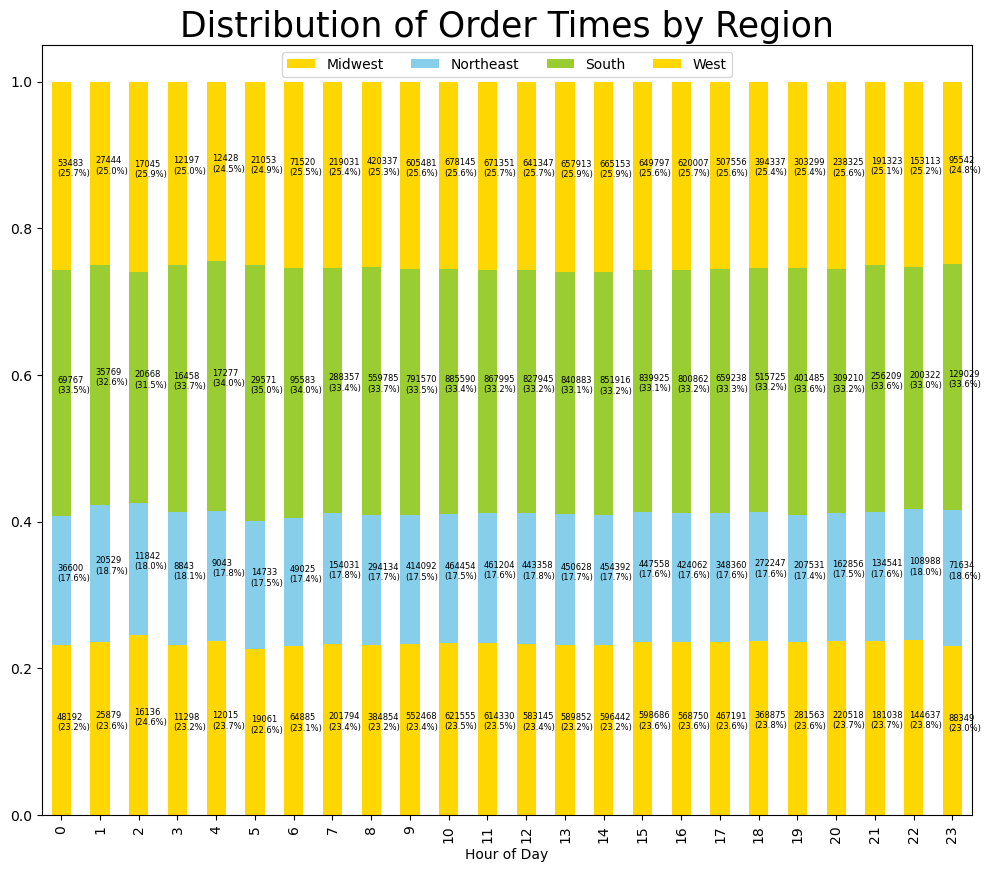

In [44]:
#Creating stacked bar chart for time of day and status distribution
region_hour_dist=region_hour.plot(kind='bar',
stacked=True,
color=['gold','skyblue','yellowgreen'],
figsize=(12,10))

plt.title('Distribution of Order Times by Region', fontsize=25)
plt.legend(loc="upper center", ncol=4)
plt.xlabel("Hour of Day")

for n, y in enumerate([*region_hour_labels.index.values]):
    for (proportion, count, x_loc) in zip(region_hour.loc[y], region_hour_labels.loc[y], region_hour.loc[y].cumsum()):

        plt.text(y=(x_loc - proportion) + (proportion / 2),
             x=n - 0.11,
             s=f'{count}\n({np.round(proportion * 100, 1)}%)', 
             color="black",
             fontsize=6)
plt.savefig('/Users/Owner/Documents/CareerFoundry/Data Immersion/Achievement 4/01-07-2024 Instacart Basket Analysis/04 Analysis/Visualizations/region_hour')
plt.show()

In [38]:
#Creating crosstab for hour of day and age
age_hour = pd.crosstab(index = df_with_depts['order_hour_of_day'], columns=df_with_depts['age_category'], normalize="index")
#creating cross tab to display labels
age_hour_labels=pd.crosstab(index=df_with_depts['order_hour_of_day'],columns=df_with_depts['age_category'])

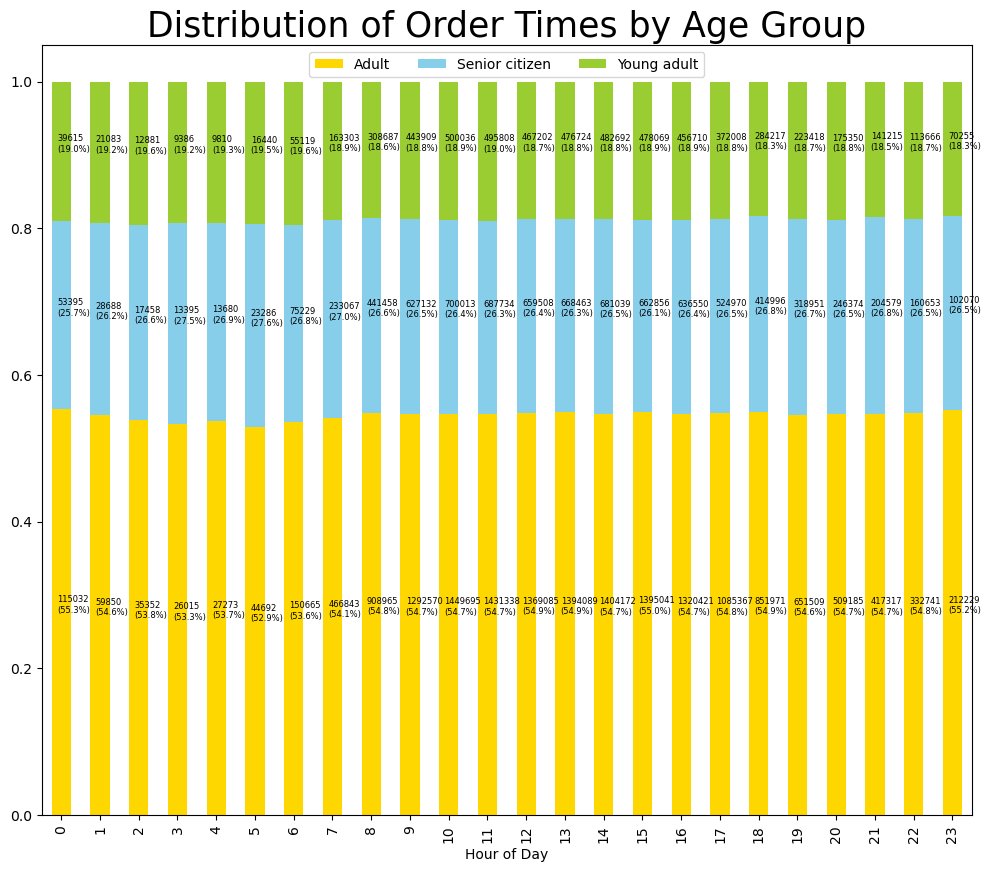

In [42]:
#Creating stacked bar chart for time of day and age distribution
age_hour_dist=age_hour.plot(kind='bar',
stacked=True,
color=['gold','skyblue','yellowgreen'],
figsize=(12,10))

plt.title('Distribution of Order Times by Age Group', fontsize=25)
plt.legend(loc="upper center", ncol=4)
plt.xlabel("Hour of Day")

for n, y in enumerate([*age_hour_labels.index.values]):
    for (proportion, count, x_loc) in zip(age_hour.loc[y], age_hour_labels.loc[y], age_hour.loc[y].cumsum()):

        plt.text(y=(x_loc - proportion) + (proportion / 2),
             x=n - 0.11,
             s=f'{count}\n({np.round(proportion * 100, 1)}%)', 
             color="black",
             fontsize=6)
plt.savefig('/Users/Owner/Documents/CareerFoundry/Data Immersion/Achievement 4/01-07-2024 Instacart Basket Analysis/04 Analysis/Visualizations/age_hour')
plt.show()

In [46]:
#Creating crosstab for department and age
age_dept = pd.crosstab(index = df_with_depts['department'], columns=df_with_depts['age_category'], normalize="index")
#creating cross tab to display labels
age_dept_labels=pd.crosstab(index=df_with_depts['department'],columns=df_with_depts['age_category'])

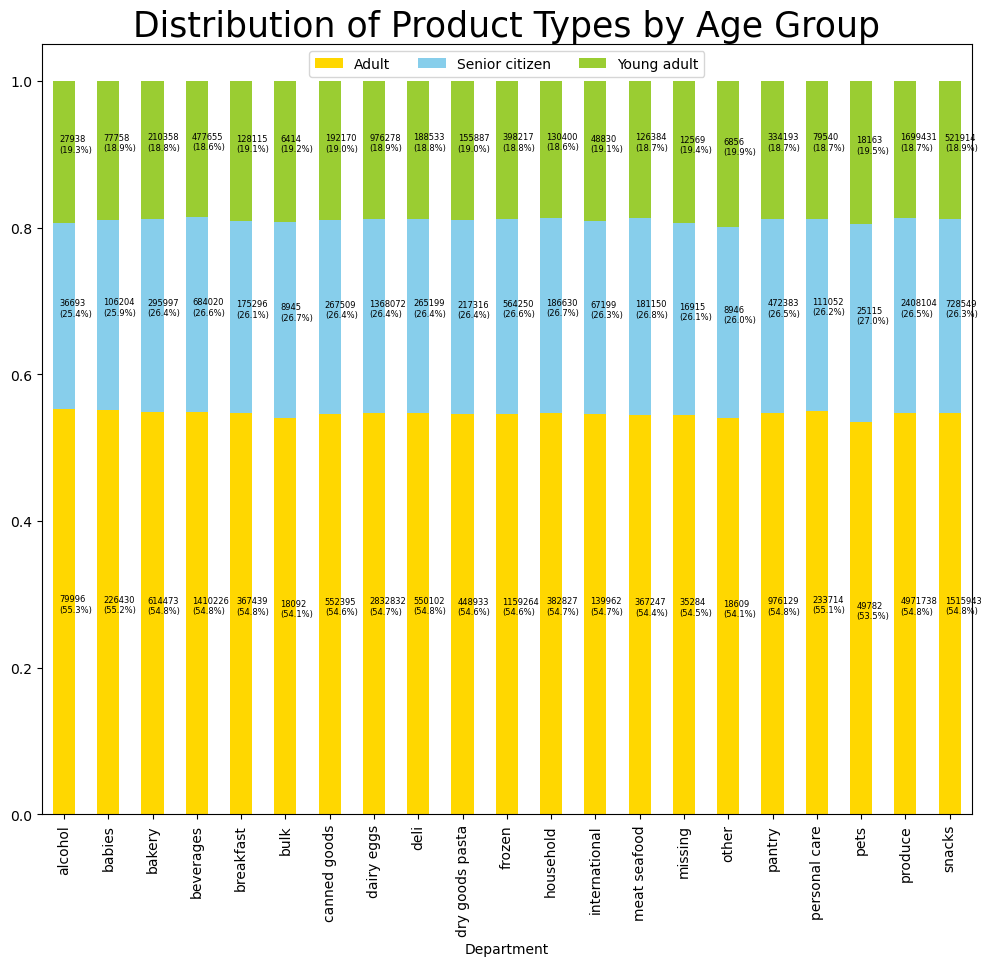

In [48]:
#Creating stacked bar chart for department and age distribution
age_dept_dist=age_dept.plot(kind='bar',
stacked=True,
color=['gold','skyblue','yellowgreen'],
figsize=(12,10))

plt.title('Distribution of Product Types by Age Group', fontsize=25)
plt.legend(loc="upper center", ncol=4)
plt.xlabel("Department")

for n, y in enumerate([*age_dept_labels.index.values]):
    for (proportion, count, x_loc) in zip(age_dept.loc[y], age_dept_labels.loc[y], age_dept.loc[y].cumsum()):

        plt.text(y=(x_loc - proportion) + (proportion / 2),
             x=n - 0.11,
             s=f'{count}\n({np.round(proportion * 100, 1)}%)', 
             color="black",
             fontsize=6)
plt.savefig('/Users/Owner/Documents/CareerFoundry/Data Immersion/Achievement 4/01-07-2024 Instacart Basket Analysis/04 Analysis/Visualizations/age_dept')
plt.show()

In [50]:
#Creating crosstab for department and family status
parent_dept = pd.crosstab(index = df_with_depts['department'], columns=df_with_depts['Parental status'], normalize="index")
#creating cross tab to display labels
parent_dept_labels=pd.crosstab(index=df_with_depts['department'],columns=df_with_depts['Parental status'])

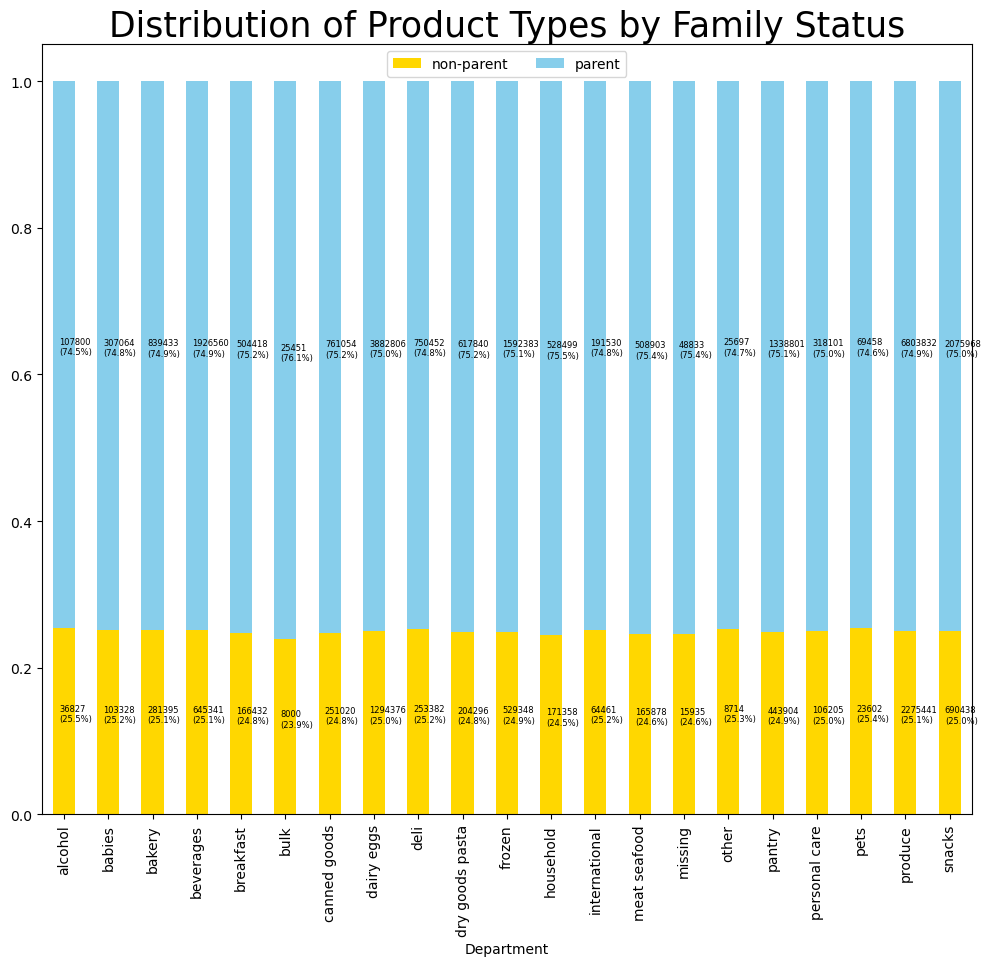

In [52]:
#Creating stacked bar chart for department and family status distribution
parent_dept_dist=parent_dept.plot(kind='bar',
stacked=True,
color=['khaki','cornflowerblue'],
figsize=(12,10))

plt.title('Distribution of Product Types by Family Status', fontsize=25)
plt.legend(loc="upper center", ncol=4)
plt.xlabel("Department")

for n, y in enumerate([*parent_dept_labels.index.values]):
    for (proportion, count, x_loc) in zip(parent_dept.loc[y], parent_dept_labels.loc[y], parent_dept.loc[y].cumsum()):

        plt.text(y=(x_loc - proportion) + (proportion / 2),
             x=n - 0.11,
             s=f'{count}\n({np.round(proportion * 100, 1)}%)', 
             color="black",
             fontsize=6)
plt.savefig('/Users/Owner/Documents/CareerFoundry/Data Immersion/Achievement 4/01-07-2024 Instacart Basket Analysis/04 Analysis/Visualizations/parent_dept')
plt.show()

In [54]:
#Creating crosstab for department and region
region_dept = pd.crosstab(index = df_with_depts['department'], columns=df_with_depts['region'], normalize="index")
#creating cross tab to display labels
region_dept_labels=pd.crosstab(index=df_with_depts['department'],columns=df_with_depts['region'])

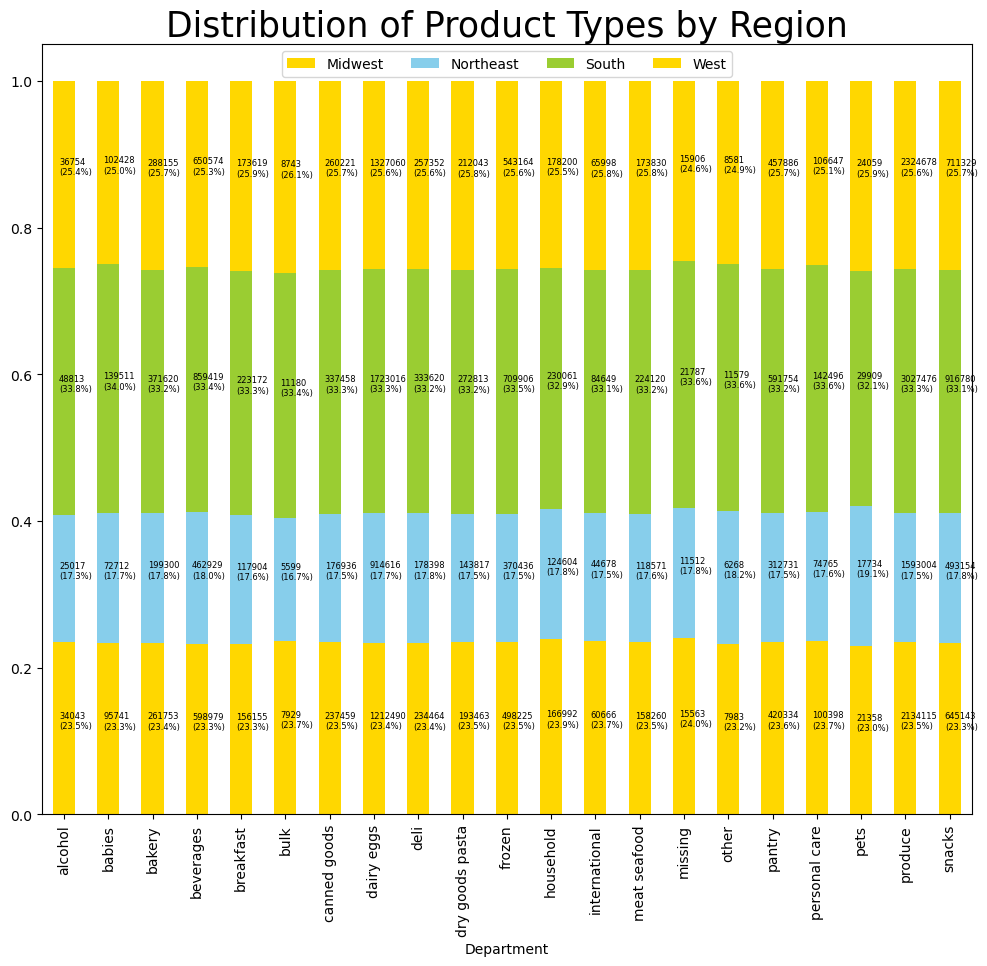

In [56]:
#Creating stacked bar chart for department and region distribution
region_dept_dist=region_dept.plot(kind='bar',
stacked=True,
color=['moccasin','royalblue','forestgreen', 'goldenrod'],
figsize=(12,10))

plt.title('Distribution of Product Types by Region', fontsize=25)
plt.legend(loc="upper center", ncol=4)
plt.xlabel("Department")

for n, y in enumerate([*region_dept_labels.index.values]):
    for (proportion, count, x_loc) in zip(region_dept.loc[y], region_dept_labels.loc[y], region_dept.loc[y].cumsum()):

        plt.text(y=(x_loc - proportion) + (proportion / 2),
             x=n - 0.11,
             s=f'{count}\n({np.round(proportion * 100, 1)}%)', 
             color="black",
             fontsize=6)
plt.savefig('/Users/Owner/Documents/CareerFoundry/Data Immersion/Achievement 4/01-07-2024 Instacart Basket Analysis/04 Analysis/Visualizations/region_dept')
plt.show()

In [7]:
#Creating crosstab for time of day and family status
parent_time_of_day = pd.crosstab(index = df_with_depts['order_hour_of_day'], columns=df_with_depts['Parental status'], normalize="index")
#creating cross tab to display labels
parent_time_labels=pd.crosstab(index=df_with_depts['order_hour_of_day'],columns=df_with_depts['Parental status'])

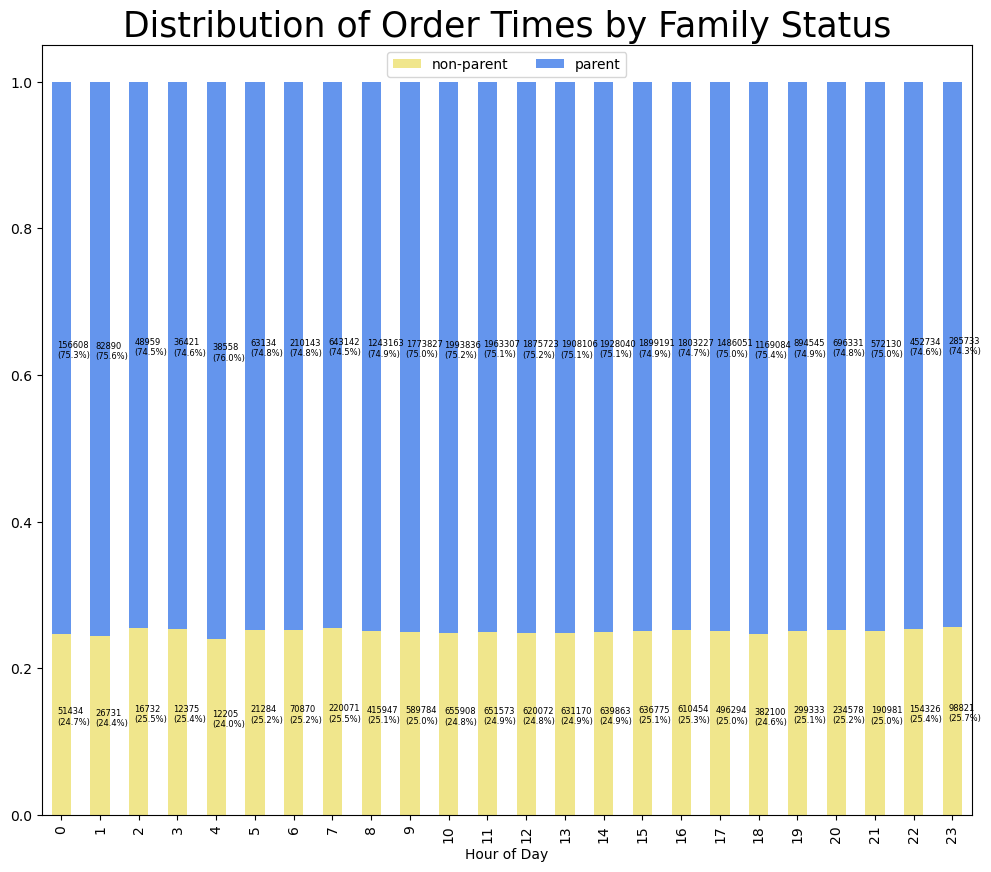

In [11]:
#Creating stacked bar chart for time of day and status distribution
parent_time_of_day_dist=parent_time_of_day.plot(kind='bar',
stacked=True,
color=['khaki','cornflowerblue'],
figsize=(12,10))

plt.title('Distribution of Order Times by Family Status', fontsize=25)
plt.legend(loc="upper center", ncol=4)
plt.xlabel("Hour of Day")

for n, y in enumerate([*parent_time_labels.index.values]):
    for (proportion, count, x_loc) in zip(parent_time_of_day.loc[y], parent_time_labels.loc[y], parent_time_of_day.loc[y].cumsum()):

        plt.text(y=(x_loc - proportion) + (proportion / 2),
             x=n - 0.11,
             s=f'{count}\n({np.round(proportion * 100, 1)}%)', 
             color="black",
             fontsize=6)
plt.savefig('/Users/Owner/Documents/CareerFoundry/Data Immersion/Achievement 4/01-07-2024 Instacart Basket Analysis/04 Analysis/Visualizations/fam_hour_color2')
plt.show()

In [13]:
#Creating crosstab for time of day and region
region_time = pd.crosstab(index = df_with_depts['order_hour_of_day'], columns=df_with_depts['region'], normalize="index")
#creating cross tab to display labels
region_time_labels=pd.crosstab(index=df_with_depts['order_hour_of_day'],columns=df_with_depts['region'])

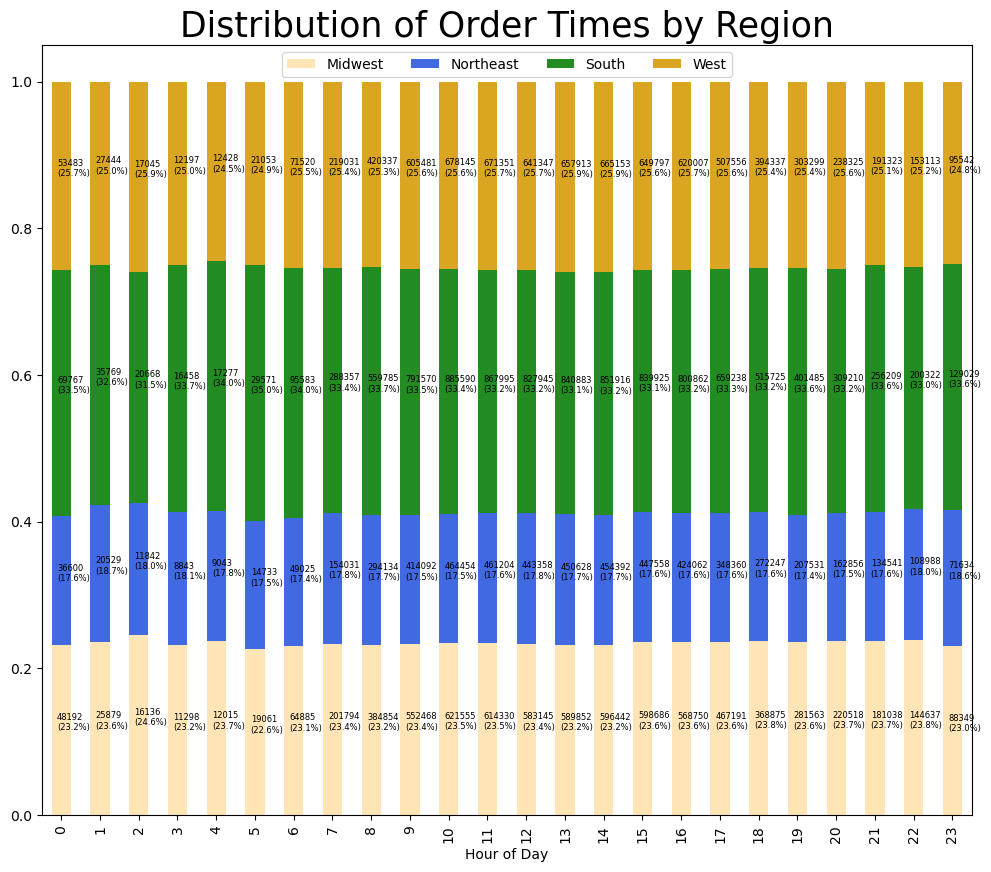

In [19]:
#Creating stacked bar chart for time of day and status distribution
region_time_dist=region_time.plot(kind='bar',
stacked=True,
color=['moccasin','royalblue','forestgreen', 'goldenrod'],
figsize=(12,10))

plt.title('Distribution of Order Times by Region', fontsize=25)
plt.legend(loc="upper center", ncol=4)
plt.xlabel("Hour of Day")

for n, y in enumerate([*region_time_labels.index.values]):
    for (proportion, count, x_loc) in zip(region_time.loc[y], region_time_labels.loc[y], region_time.loc[y].cumsum()):

        plt.text(y=(x_loc - proportion) + (proportion / 2),
             x=n - 0.11,
             s=f'{count}\n({np.round(proportion * 100, 1)}%)', 
             color="black",
             fontsize=6)
plt.savefig('/Users/Owner/Documents/CareerFoundry/Data Immersion/Achievement 4/01-07-2024 Instacart Basket Analysis/04 Analysis/Visualizations/region_time')
plt.show()

In [7]:
#Creating crosstab for day of week and region
region_dow = pd.crosstab(index = df_with_depts['order_dow'], columns=df_with_depts['region'], normalize="index")
#creating cross tab to display labels
region_dow_labels=pd.crosstab(index=df_with_depts['order_dow'],columns=df_with_depts['region'])

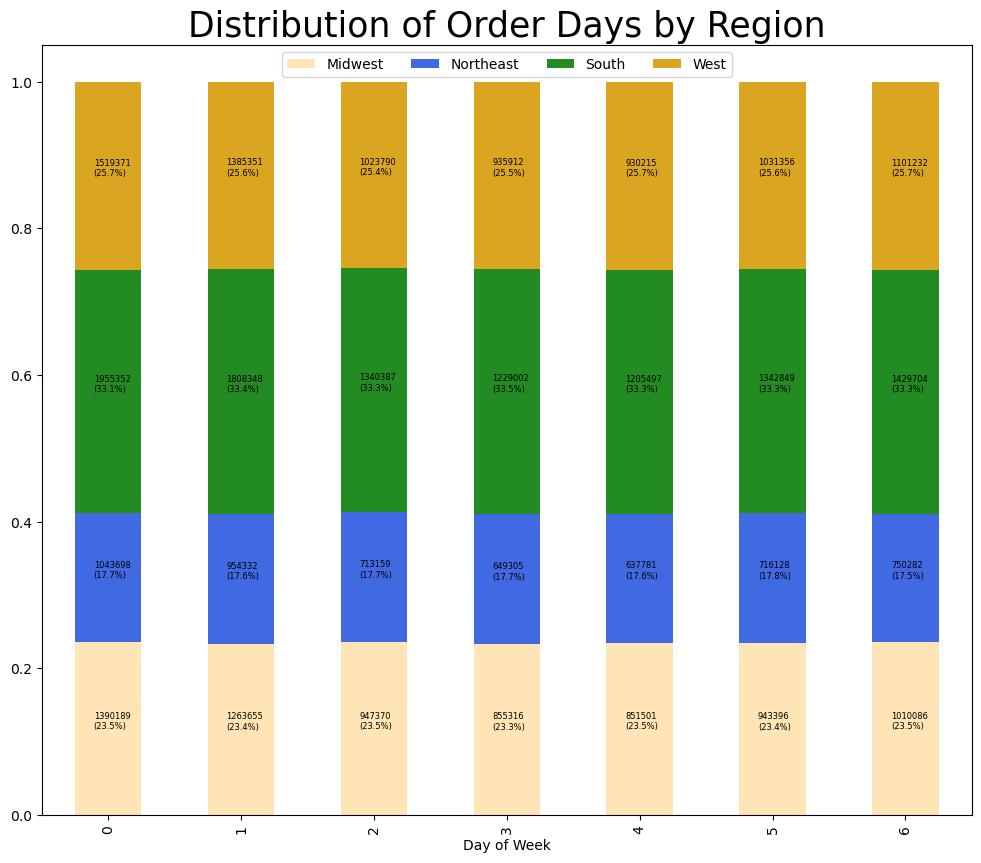

In [9]:
#Creating stacked bar chart for time of day and status distribution
region_dow_dist=region_dow.plot(kind='bar',
stacked=True,
color=['moccasin','royalblue','forestgreen', 'goldenrod'],
figsize=(12,10))

plt.title('Distribution of Order Days by Region', fontsize=25)
plt.legend(loc="upper center", ncol=4)
plt.xlabel("Day of Week")

for n, y in enumerate([*region_dow_labels.index.values]):
    for (proportion, count, x_loc) in zip(region_dow.loc[y], region_dow_labels.loc[y], region_dow.loc[y].cumsum()):

        plt.text(y=(x_loc - proportion) + (proportion / 2),
             x=n - 0.11,
             s=f'{count}\n({np.round(proportion * 100, 1)}%)', 
             color="black",
             fontsize=6)
plt.savefig('/Users/Owner/Documents/CareerFoundry/Data Immersion/Achievement 4/01-07-2024 Instacart Basket Analysis/04 Analysis/Visualizations/region_dow')
plt.show()

In [11]:
#Creating crosstab for product type and region
region_dept = pd.crosstab(index = df_with_depts['department'], columns=df_with_depts['region'], normalize="index")
#creating cross tab to display labels
region_dept_labels=pd.crosstab(index=df_with_depts['department'],columns=df_with_depts['region'])

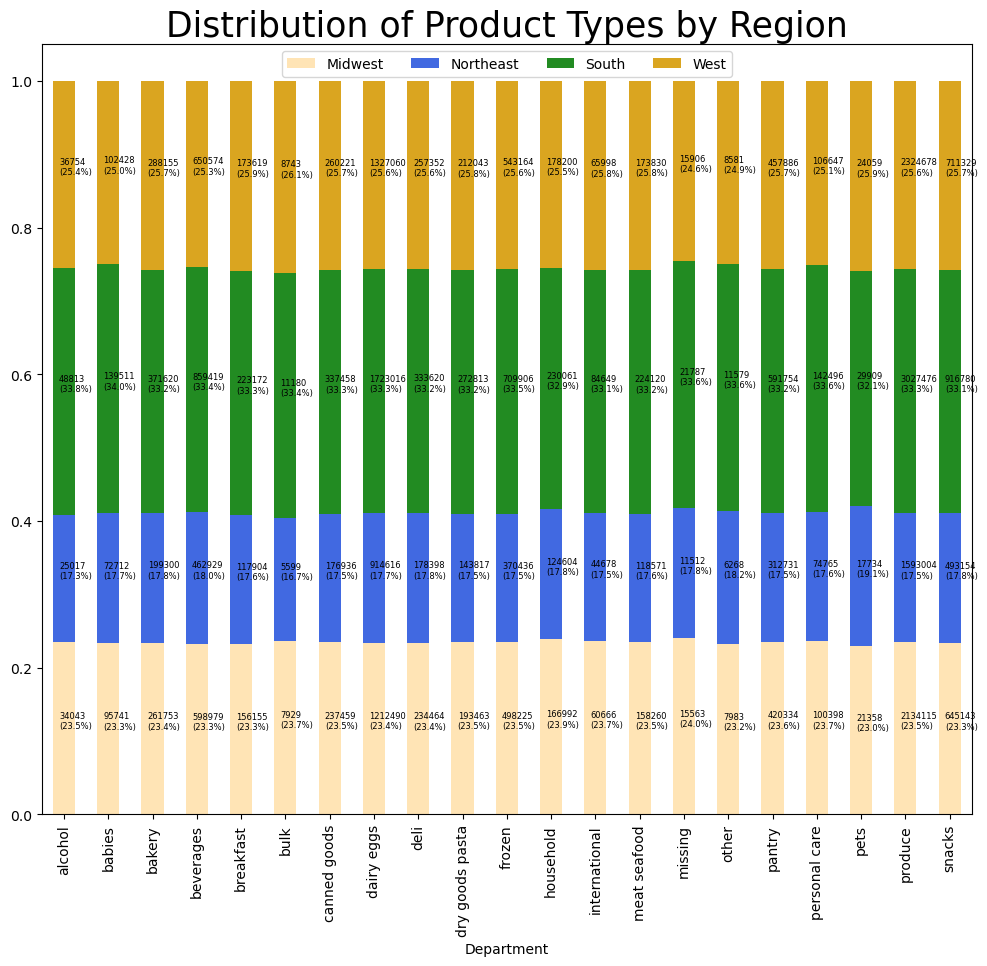

In [13]:
#Creating stacked bar chart for department and region distribution
region_dept_dist=region_dept.plot(kind='bar',
stacked=True,
color=['moccasin','royalblue','forestgreen', 'goldenrod'],
figsize=(12,10))

plt.title('Distribution of Product Types by Region', fontsize=25)
plt.legend(loc="upper center", ncol=4)
plt.xlabel("Department")

for n, y in enumerate([*region_dept_labels.index.values]):
    for (proportion, count, x_loc) in zip(region_dept.loc[y], region_dept_labels.loc[y], region_dept.loc[y].cumsum()):

        plt.text(y=(x_loc - proportion) + (proportion / 2),
             x=n - 0.11,
             s=f'{count}\n({np.round(proportion * 100, 1)}%)', 
             color="black",
             fontsize=6)
plt.savefig('/Users/Owner/Documents/CareerFoundry/Data Immersion/Achievement 4/01-07-2024 Instacart Basket Analysis/04 Analysis/Visualizations/region_dept')
plt.show()

In [15]:
#Creating crosstab for day of week and family status
parent_dow = pd.crosstab(index = df_with_depts['order_dow'], columns=df_with_depts['Parental status'], normalize="index")
#creating cross tab to display labels
parent_dow_labels=pd.crosstab(index=df_with_depts['order_dow'],columns=df_with_depts['Parental status'])

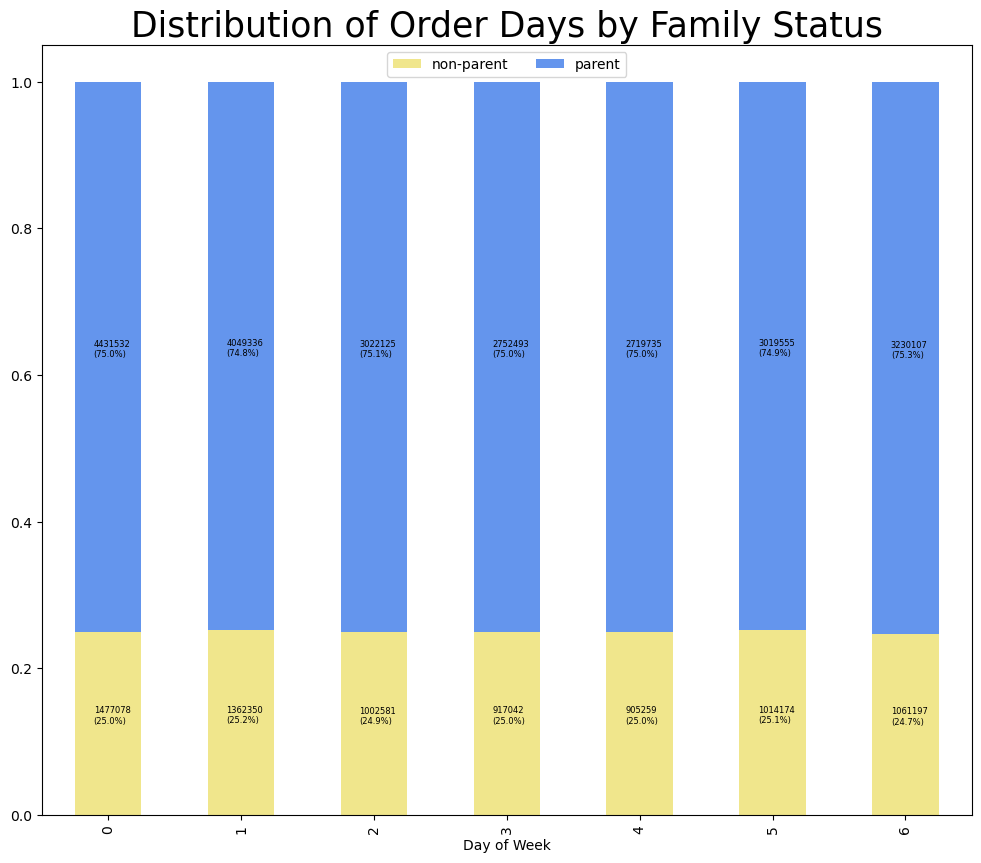

In [17]:
#Creating stacked bar chart for time of day and status distribution
parent_dow_dist=parent_dow.plot(kind='bar',
stacked=True,
color=['khaki','cornflowerblue'],
figsize=(12,10))

plt.title('Distribution of Order Days by Family Status', fontsize=25)
plt.legend(loc="upper center", ncol=4)
plt.xlabel("Day of Week")

for n, y in enumerate([*parent_dow_labels.index.values]):
    for (proportion, count, x_loc) in zip(parent_dow.loc[y], parent_dow_labels.loc[y], parent_dow.loc[y].cumsum()):

        plt.text(y=(x_loc - proportion) + (proportion / 2),
             x=n - 0.11,
             s=f'{count}\n({np.round(proportion * 100, 1)}%)', 
             color="black",
             fontsize=6)
plt.savefig('/Users/Owner/Documents/CareerFoundry/Data Immersion/Achievement 4/01-07-2024 Instacart Basket Analysis/04 Analysis/Visualizations/fam_dow')
plt.show()

In [19]:
#Creating crosstab for department and family status
parent_dept = pd.crosstab(index = df_with_depts['department'], columns=df_with_depts['Parental status'], normalize="index")
#creating cross tab to display labels
parent_dept_labels=pd.crosstab(index=df_with_depts['department'],columns=df_with_depts['Parental status'])

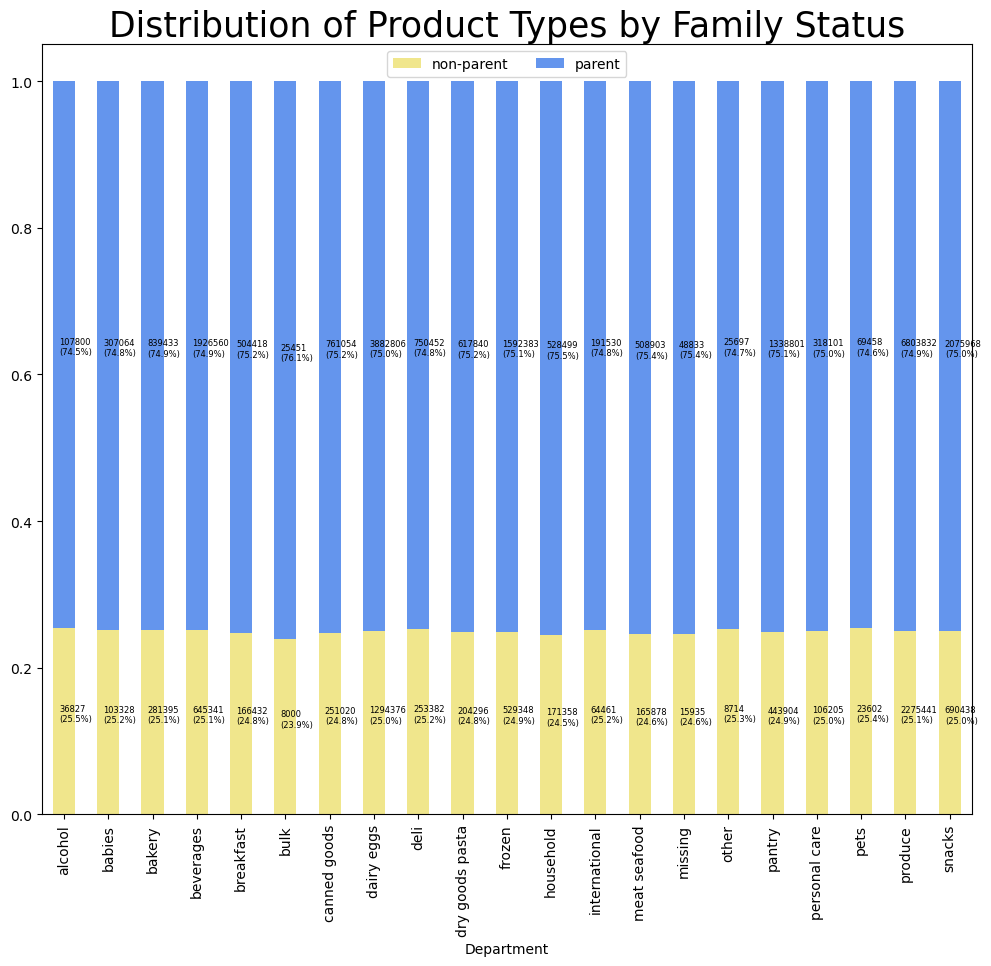

In [21]:
#Creating stacked bar chart for department and family status distribution
parent_dept_dist=parent_dept.plot(kind='bar',
stacked=True,
color=['khaki','cornflowerblue'],
figsize=(12,10))

plt.title('Distribution of Product Types by Family Status', fontsize=25)
plt.legend(loc="upper center", ncol=4)
plt.xlabel("Department")

for n, y in enumerate([*parent_dept_labels.index.values]):
    for (proportion, count, x_loc) in zip(parent_dept.loc[y], parent_dept_labels.loc[y], parent_dept.loc[y].cumsum()):

        plt.text(y=(x_loc - proportion) + (proportion / 2),
             x=n - 0.11,
             s=f'{count}\n({np.round(proportion * 100, 1)}%)', 
             color="black",
             fontsize=6)
plt.savefig('/Users/Owner/Documents/CareerFoundry/Data Immersion/Achievement 4/01-07-2024 Instacart Basket Analysis/04 Analysis/Visualizations/parent_dept')
plt.show()

In [23]:
from matplotlib import colormaps
list(colormaps)

['magma',
 'inferno',
 'plasma',
 'viridis',
 'cividis',
 'twilight',
 'twilight_shifted',
 'turbo',
 'Blues',
 'BrBG',
 'BuGn',
 'BuPu',
 'CMRmap',
 'GnBu',
 'Greens',
 'Greys',
 'OrRd',
 'Oranges',
 'PRGn',
 'PiYG',
 'PuBu',
 'PuBuGn',
 'PuOr',
 'PuRd',
 'Purples',
 'RdBu',
 'RdGy',
 'RdPu',
 'RdYlBu',
 'RdYlGn',
 'Reds',
 'Spectral',
 'Wistia',
 'YlGn',
 'YlGnBu',
 'YlOrBr',
 'YlOrRd',
 'afmhot',
 'autumn',
 'binary',
 'bone',
 'brg',
 'bwr',
 'cool',
 'coolwarm',
 'copper',
 'cubehelix',
 'flag',
 'gist_earth',
 'gist_gray',
 'gist_heat',
 'gist_ncar',
 'gist_rainbow',
 'gist_stern',
 'gist_yarg',
 'gnuplot',
 'gnuplot2',
 'gray',
 'hot',
 'hsv',
 'jet',
 'nipy_spectral',
 'ocean',
 'pink',
 'prism',
 'rainbow',
 'seismic',
 'spring',
 'summer',
 'terrain',
 'winter',
 'Accent',
 'Dark2',
 'Paired',
 'Pastel1',
 'Pastel2',
 'Set1',
 'Set2',
 'Set3',
 'tab10',
 'tab20',
 'tab20b',
 'tab20c',
 'grey',
 'gist_grey',
 'gist_yerg',
 'Grays',
 'magma_r',
 'inferno_r',
 'plasma_r',
 'viri

In [31]:
#Creating crosstab for department and frequency status
dept_freq = pd.crosstab(index = df_with_depts['department'], columns=df_with_depts['frequency_flag'], normalize="index")
#creating cross tab to display labels
dept_freq_labels=pd.crosstab(index=df_with_depts['department'],columns=df_with_depts['frequency_flag'])

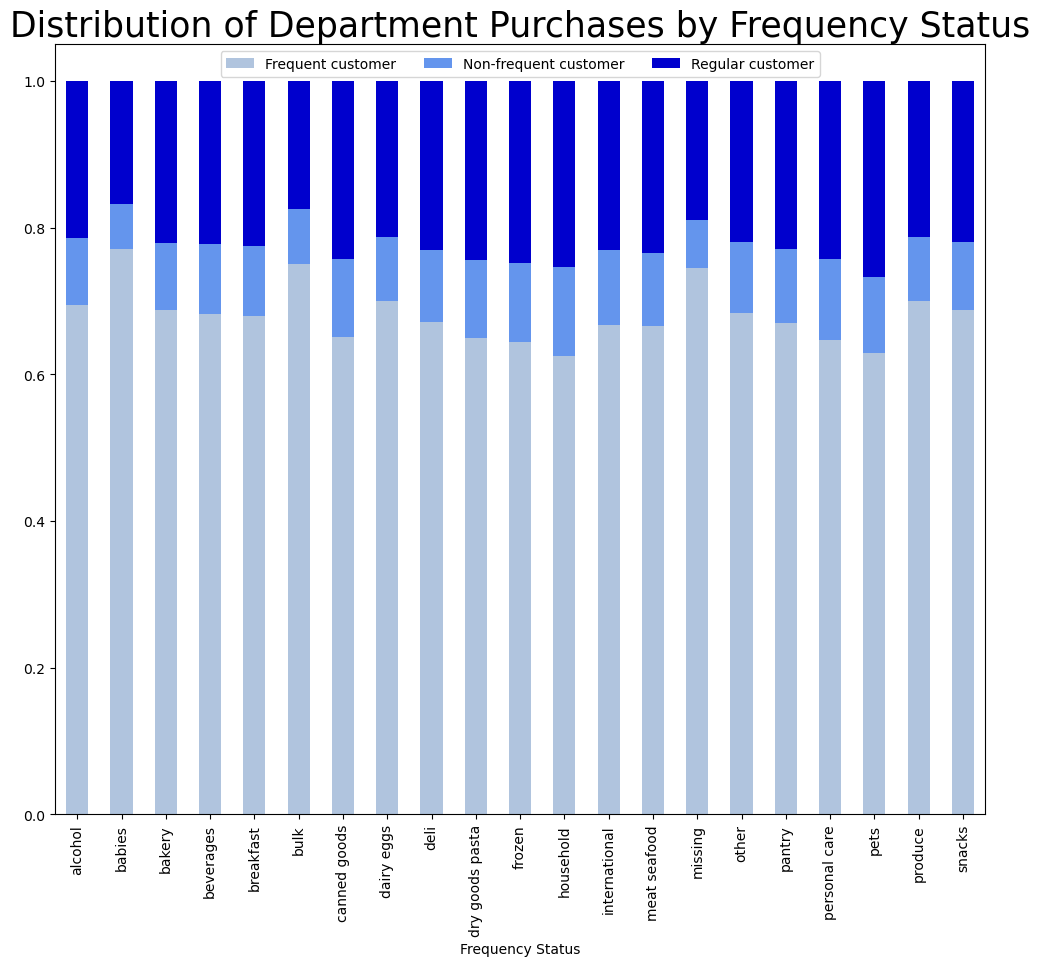

In [49]:
#Creating stacked bar chart for department and frequency distribution
dept_freq_dist=dept_freq.plot(kind='bar',
stacked=True,
color=['lightsteelblue','cornflowerblue','mediumblue'],
figsize=(12,10)),

plt.title('Distribution of Department Purchases by Frequency Status', fontsize=25)
plt.legend(loc="upper center", ncol=4)
plt.xlabel("Frequency Status")

plt.savefig('/Users/Owner/Documents/CareerFoundry/Data Immersion/Achievement 4/01-07-2024 Instacart Basket Analysis/04 Analysis/Visualizations/freq_no_labels')
plt.show()

In [51]:
#Creating crosstab for department and loyalty status
dept_loyal_2 = pd.crosstab(index = df_with_depts['department'], columns=df_with_depts['loyalty_flag'], normalize="index")
#creating cross tab to display labels
dept_loyal_2_labels=pd.crosstab(index=df_with_depts['department'],columns=df_with_depts['loyalty_flag'])

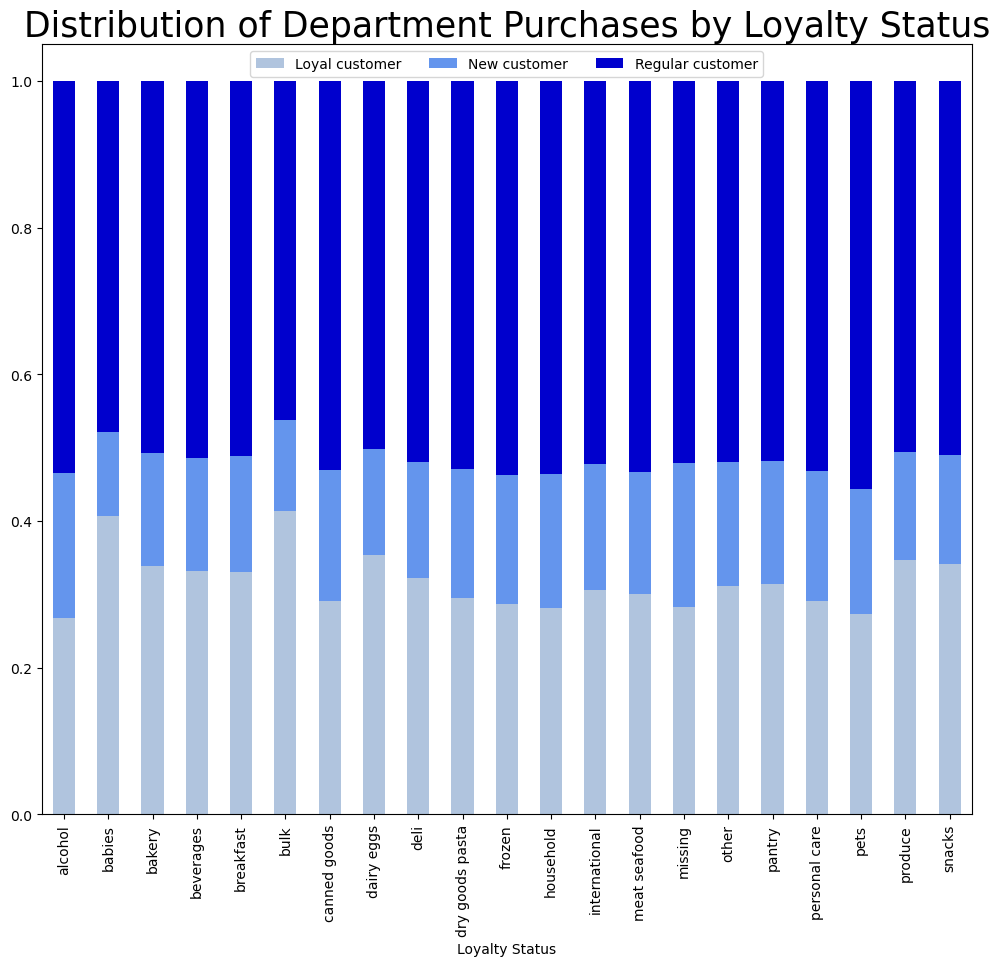

In [57]:
#Creating stacked bar chart for department and loyalty distribution
dept_loyal_2_dist=dept_loyal_2.plot(kind='bar',
stacked=True,
color=['lightsteelblue','cornflowerblue','mediumblue'],
figsize=(12,10))

plt.title('Distribution of Department Purchases by Loyalty Status', fontsize=25)
plt.legend(loc="upper center", ncol=4)
plt.xlabel("Loyalty Status")

plt.savefig('/Users/Owner/Documents/CareerFoundry/Data Immersion/Achievement 4/01-07-2024 Instacart Basket Analysis/04 Analysis/Visualizations/freq_no_labels')
plt.show()

In [61]:
# Count the number of orders by price range and parental income
price_parent = df_with_depts.groupby(['price_range_loc', 'Family income']).size().unstack(fill_value=0)

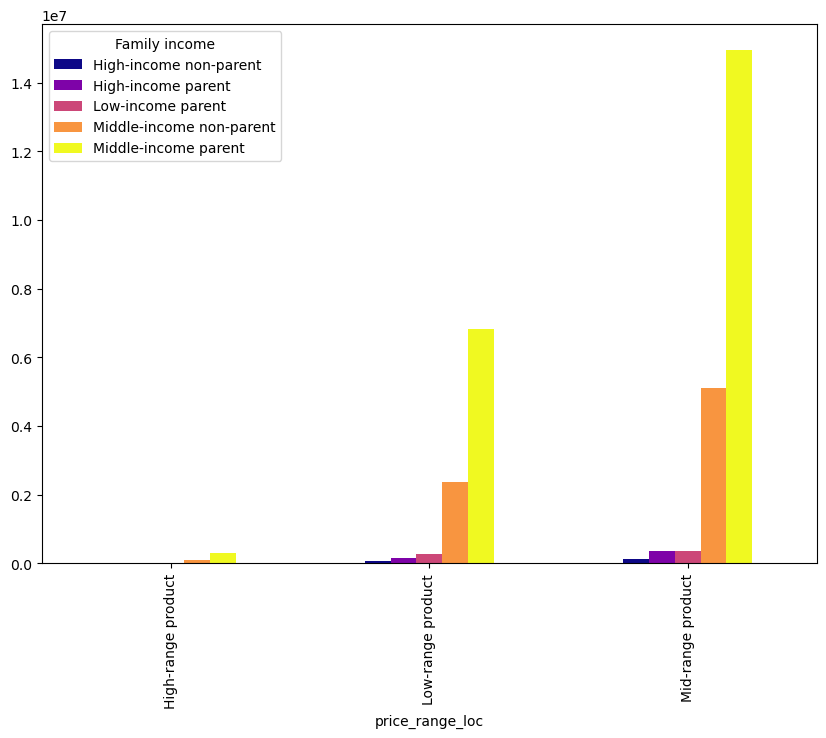

In [81]:
# Plotting
ax = price_parent.plot(kind='bar', stacked=False, figsize=(10, 7), colormap='plasma')

In [83]:
#export to file
ax.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'price_parent.png'),bbox_inches = 'tight')

In [71]:
# Count the number of orders by price range and frequency of purchase
price_age = df_with_depts.groupby(['price_range_loc', 'age_category']).size().unstack(fill_value=0)

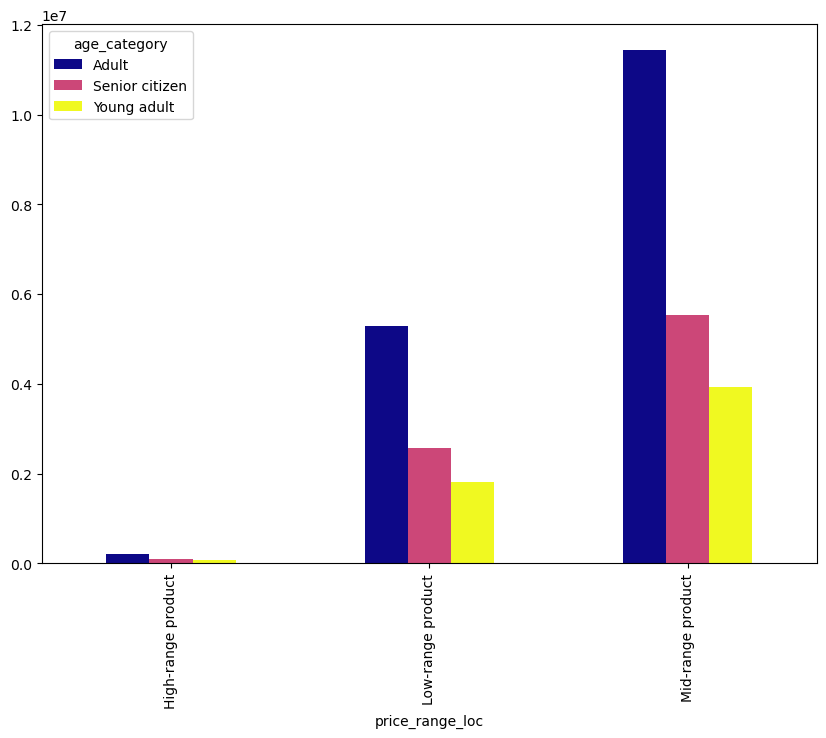

In [79]:
# Plotting
ax = price_age.plot(kind='bar', stacked=False, figsize=(10, 7), colormap='plasma')

In [85]:
#export to file
ax.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'price_age.png'),bbox_inches = 'tight')

In [87]:
# Count the number of orders by spending level and income
spend_income = df_with_depts.groupby(['spending_flag', 'income_level']).size().unstack(fill_value=0)

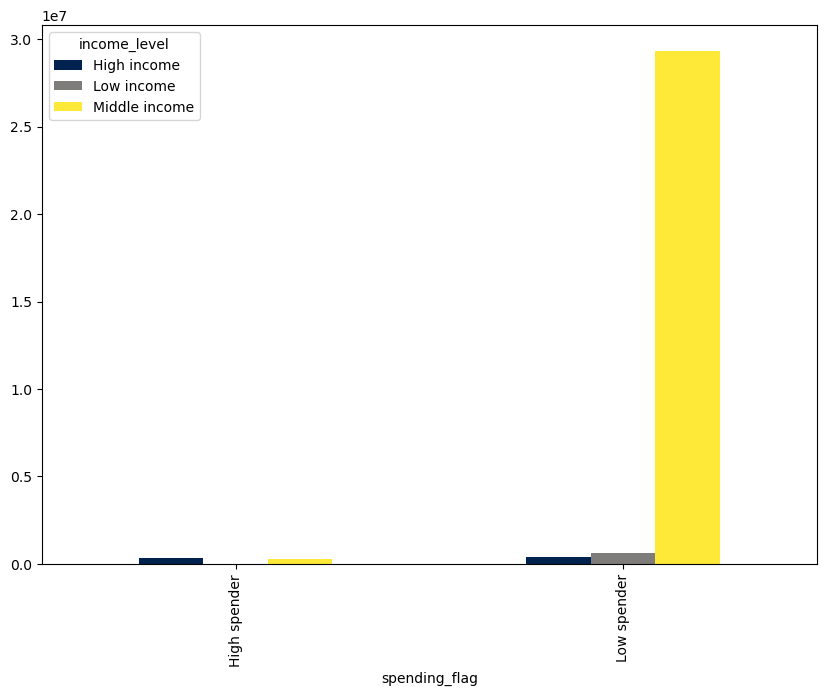

In [91]:
# Plotting
ax = spend_income.plot(kind='bar', stacked=False, figsize=(10, 7), colormap='cividis')

In [93]:
#export to file
ax.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'spend_income.png'),bbox_inches = 'tight')

In [95]:
# Count the number of orders by spending level and parental status
spend_income = df_with_depts.groupby(['spending_flag', 'parent_status_by_age']).size().unstack(fill_value=0)

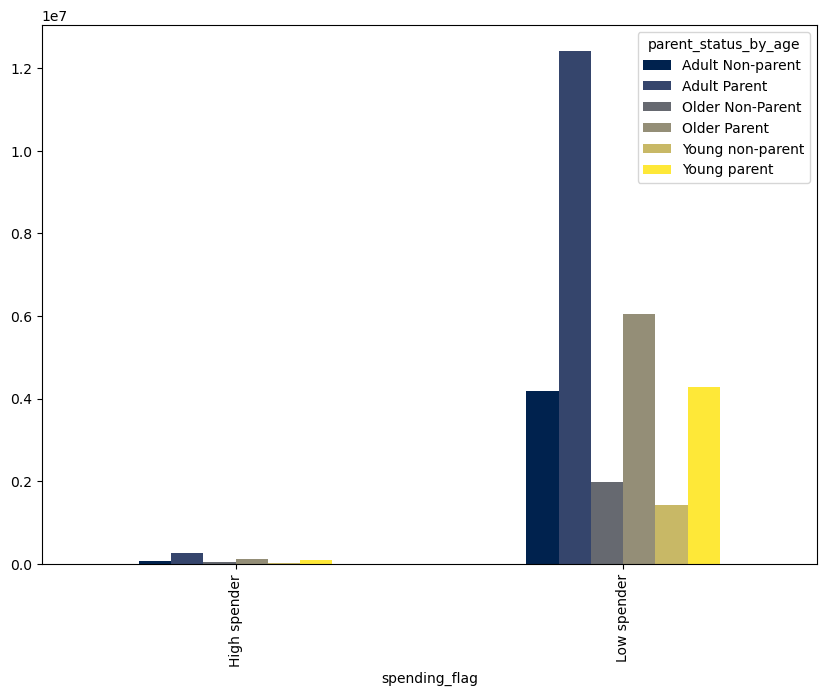

In [97]:
# Plotting
ax = spend_income.plot(kind='bar', stacked=False, figsize=(10, 7), colormap='cividis')

In [99]:
#export to file
ax.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'spend_parent.png'),bbox_inches = 'tight')